In [1]:
import pandas as pd

# Exportamos datos

data_xy = pd.read_csv('csv/DataFinal.csv')

# 1. Procesado de los datos

Mapeamos los valores de posiciones a valores numéricos.

In [2]:
unique_values = data_xy['Posicion'].unique()
print(unique_values)

['DL' 'DF' 'CC,DL' 'DL,CC' 'DF,CC' 'CC' 'CC,DF' 'PO' 'DF,DL' 'DL,DF']


La idea es crear cuatro variables binarias nuevas, que indiquen si el jugador juega o no es esa posición.

In [3]:
# Codificamos las posiciones
data_xy['Posicion_1'] = data_xy['Posicion'].str.contains('PO') # Verdadero si el jugador es portero
data_xy['Posicion_2'] = data_xy['Posicion'].str.contains('DF') # Verdadero si el jugador es defensa
data_xy['Posicion_3'] = data_xy['Posicion'].str.contains('CC') # Verdadero si el jugador es centrocampista
data_xy['Posicion_4'] = data_xy['Posicion'].str.contains('DL') # Verdadero si el jugador es delantero

data_xy.head()

,Jugador,Edad,Temporada,Posicion,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,...,Salario semanal,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
0,Aaron Connolly,19.0,2019,DL,5123.0,24.0,14.0,1258.0,3.0,1.0,...,31990.0,5123.0,15.0,15.0,200.78,200.78,False,False,False,True
1,Adam Webster,24.0,2019,DF,5123.0,31.0,31.0,2668.0,3.0,1.0,...,48519.0,5123.0,15.0,15.0,200.78,200.78,False,True,False,False
2,Alexis Mac Allister,20.0,2019,"CC,DL",5123.0,9.0,4.0,352.0,0.0,0.0,...,42653.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
3,Alireza Jahanbakhsh,25.0,2019,"DL,CC",5123.0,10.0,3.0,311.0,2.0,0.0,...,69312.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
4,Bernardo,24.0,2019,"DF,CC",5123.0,14.0,7.0,679.0,0.0,0.0,...,34656.0,5123.0,15.0,15.0,200.78,200.78,False,True,True,False


In [4]:
nombres_de_columnas = data_xy.columns
nombres_de_columnas

Index(['Jugador', 'Edad', 'Temporada', 'Posicion', 'Valor liga ini',
       'Partidos', 'Titularidades', 'Minutos', 'Goles', 'Asistencias',
       'Goles penalti', 'Penaltis lanzados', 'Amarillas', 'Rojas', 'xG',
       'xG sin penaltis', 'xAG', 'Conducciones progresivas',
       'Pases progresivos', 'Pases progresivos recibidos', 'Goles encajados',
       'Disparos recibidos', 'Salvadas', 'Porterias a cero',
       'Penaltis en contra', 'Penaltis encajados', 'Penaltis detenidos',
       'Penaltis fallados (en contra)', '2a amarilla', 'Faltas cometidas',
       'Faltas recibidas', 'Fueras de juego', 'Balones centrados',
       'Intercepciones', 'Entradas ganadas', 'Penaltis concedidos',
       'Goles en propia', 'Recuperaciones', 'Aereos ganados',
       'Aereos perdidos', 'Disparos', 'Tiros a puerta', 'Distancia tiros',
       'Faltas lanzadas', 'Pases completados', 'Pases intentados',
       'Distancia pases', 'Dist progresiva pases', 'Pases cortos completados',
       'Pases cortos 

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

x = data_xy.drop(['Jugador', 'Temporada', 'Salario semanal', 'Posicion'], axis=1)
y = data_xy['Salario semanal']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Capturamos los índices de las características continuas y categóricas
categoricas_indices = ['Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4']
continuas_indices = [col for col in x.columns if col not in categoricas_indices]

El número de instancias del problema es: 10786
El número de características del problema es: 73


# 2. Análisis de los datos

Separamos en test y train para evitar data snooping.

In [6]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  9168
El número de instancias para el test es:  1618


Como tenemos un dataset de tamaño medio selecciono el 15% de la muestra para test, para así tener una buena cantidad de datos para entrenar nuestros modelos y bastantes datos para luego comprobar como funcionaría el modelo elegido para datos de fuera de la muestra.

Resumen de los datos.

In [7]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = x_train[columna].count()
    rango_valores = f"{x_train[columna].min()} - {x_train[columna].max()}"
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                  Media  Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              25.33    25.00               4.26     41.0    15.0                0.0
Valor liga ini                  3328.37  3114.00            1439.62   6605.0  1598.0                0.0
Partidos                          22.92    25.00              10.41     38.0     1.0                0.0
Titularidades                     18.07    18.00              10.96     38.0     0.0                0.0
Minutos                         1613.52  1629.00             941.39   3420.0     1.0                0.0
Goles                              2.36     1.00               3.86     41.0     0.0                0.0
Asistencias                        1.63     1.00               2.28     21.0     0.0                0.0
Goles penalti                      0.22     0.00               0.87     14.0     0.0                0.0
Penaltis lanzados     

Respecto a los datos continuos, podemos observar por un lado que algunas variables tienen intervalos muy grandes, convendría escalarlos para facilitar el trabajo de los modelos de aprendizaje, en especial modelos como KNN que trabajan con las distancias entre puntos. Por otro lado podemos observar también que no existen datos faltantes.

En cuanto a las variables categóricas observamos simplemente el resultado de haberlas codificado a las mismas, nos ha creado una serie de variables binarias donde se almacena la información acerca de posición y competiciones del jugador en cuestión.

Histograma con la cantidad de jugadores por posición.

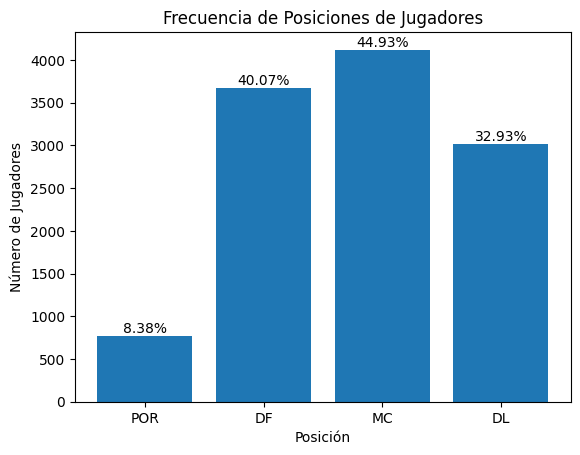

In [8]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por posición
frecuencia_posiciones = x_train[['Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4']].sum(axis=0)

# Crear una figura y un eje
fig, ax = plt.subplots()
tags = ['POR', 'DF', 'MC', 'DL']

# Añadir barras al gráfico
ax.bar(tags, frecuencia_posiciones)

# Configurar etiquetas y título
ax.set_xlabel('Posición')
ax.set_ylabel('Número de Jugadores')
ax.set_title('Frecuencia de Posiciones de Jugadores')

# Añadir etiquetas con el número exacto de jugadores encima de las barras
for i, count in enumerate(frecuencia_posiciones):
    ax.text(i, count + 1, str(round(100*count/len(x_train),2))+'%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Podemos observar que tenemos una cantidad bastante reducida de porteros y delanteros en comparación con el resto de posiciones, no obstante creo que es una cantidad significativa de muestras.

Distribución de salarios por posición.

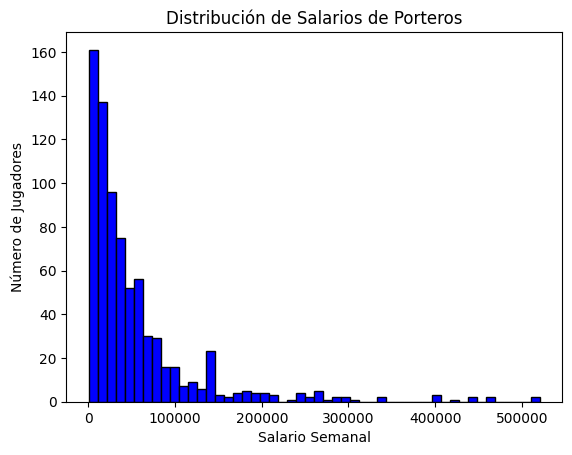

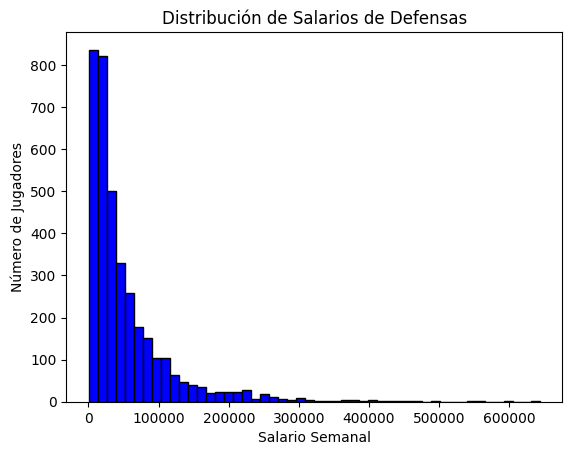

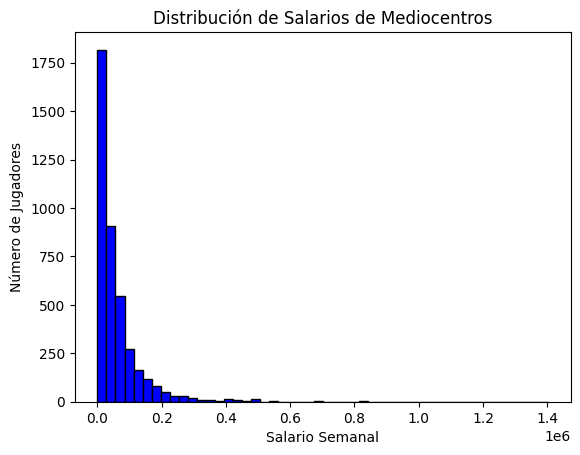

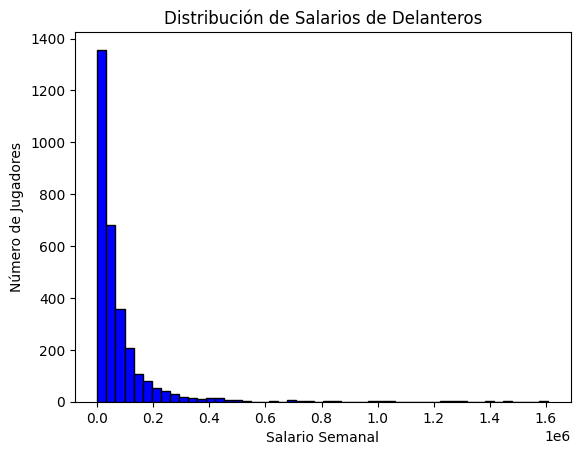

In [9]:
# Índices por posición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

salarios = y_train

# Crea un histograma de los salarios
# Porteros
plt.hist(salarios[c1], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.hist(salarios[c2], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.hist(salarios[c3], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.hist(salarios[c4], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

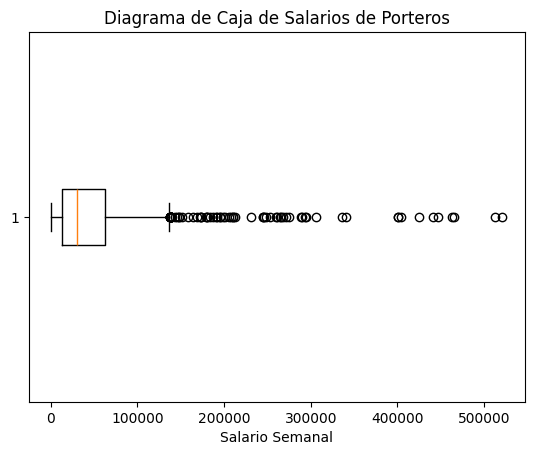

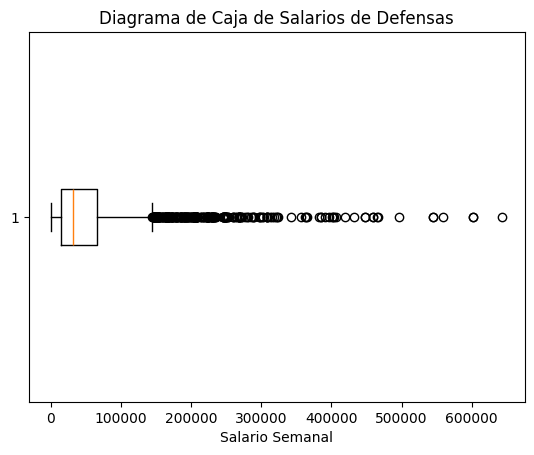

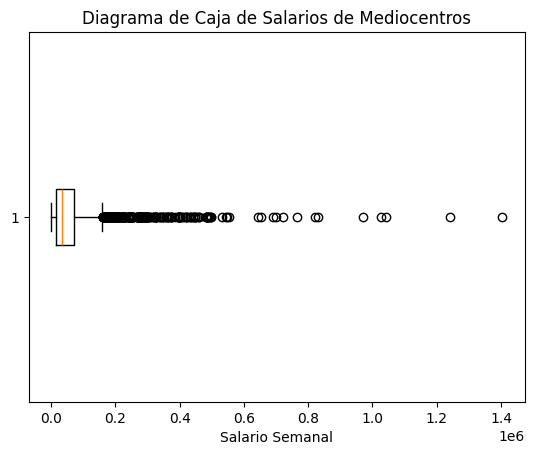

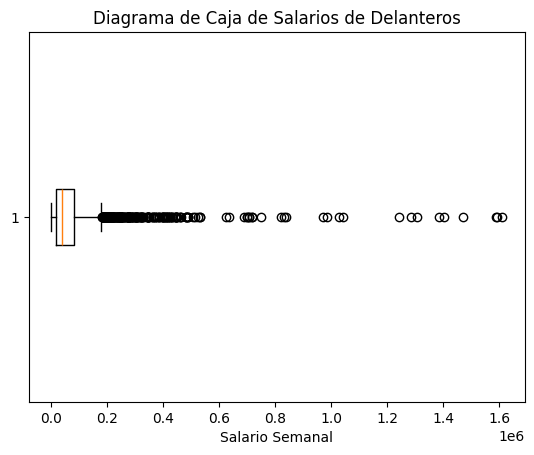

In [10]:
# Crea un diagrama de caja de los salarios
# Porteros
plt.boxplot(salarios[c1], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.boxplot(salarios[c2], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.boxplot(salarios[c3], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.boxplot(salarios[c4], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

Podemos ver que para todas las posiciones existen salarios que están muy por encima de la media, aunque en distintas magnitudes dependiendo de la posición, vemos que los delanteros son los que más cobran y los porteros los que menos.

In [11]:
# Define las columnas y los índices para el DataFrame
indices = ['Portero', 'Defensa', 'Mediocentro', 'Delantero', 'Total']
columnas = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Crea un DataFrame con los cuartiles
cuartiles_df = pd.DataFrame(index=indices, columns=columnas)

# Llena el DataFrame con los cuartiles
cuartiles_df.loc['Portero', :] = y_train[c1].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Defensa', :] = y_train[c2].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Mediocentro', :] = y_train[c3].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Delantero', :] = y_train[c4].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Total', :] = y_train.describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values

# Muestra el DataFrame
cuartiles_df

,count,mean,std,min,25%,50%,75%,max
Portero,768.0,54424.690104,72152.67183,441.0,12539.0,29781.5,62522.75,520734.0
Defensa,3674.0,52653.455362,64680.44176,296.0,14331.0,30762.0,66138.25,643199.0
Mediocentro,4119.0,61082.931537,86853.258281,296.0,14555.0,34008.0,72729.0,1403262.0
Delantero,3019.0,73155.762173,121783.716618,296.0,16527.5,38001.0,82044.0,1609609.0
Total,9168.0,61919.333333,91465.808295,296.0,15003.0,33957.0,73426.0,1609609.0


Aquí vemos más claro la diferencia del salario máximo entre posiciones, viendolo así observamos que la diferencia entre salarios de porteros, defensas y centrocampistas no es muy grande, al igual que la media, y que verdaderamente la posición más outlier es la de delantero. En cuanto a los jugadores con varias posiciones, al incluir todo tipo de posiciones no es más que una representación del total del conjunto cuyas estadísticas son similares a las del total.

Distribución en cuartiles y de gráfico de barras de la variable a predecir.

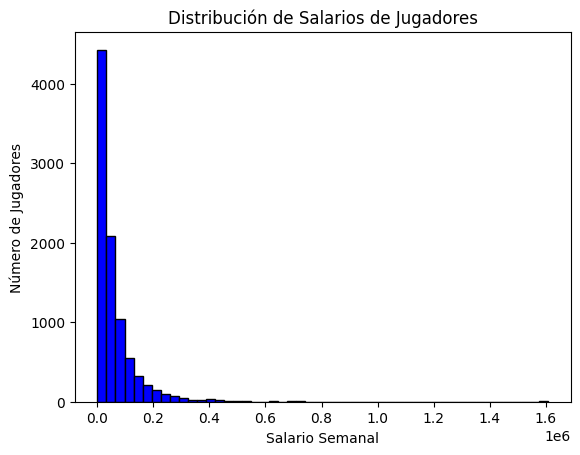

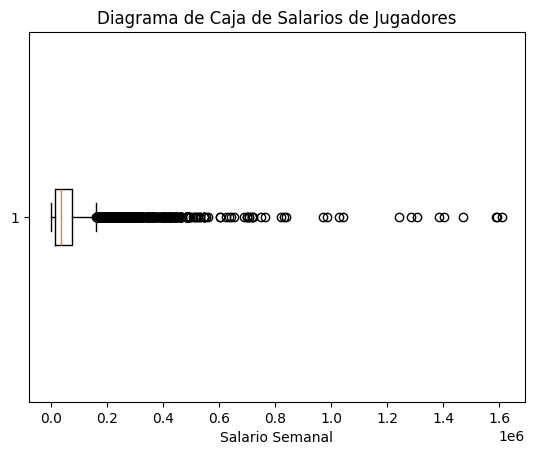

count    9.168000e+03
mean     6.191933e+04
std      9.146581e+04
min      2.960000e+02
25%      1.500300e+04
50%      3.395700e+04
75%      7.342600e+04
max      1.609609e+06
Name: Salario semanal, dtype: float64


In [12]:
# Crea un histograma de los salarios
plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Crea un diagrama de caja de los salarios
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

**Conclusiones**

* Se cumple ley de la potencia, muchos valores pequeños, pero probabilidad de obtener algunos valores muy grandes, como se puede observar en el gráfico de barras o en el de caja.
* Los 3 percentiles están a distancias similares unos de otros, así como con el valor mínimo, hasta aquí bastante balanceados los datos. Existe no obstante una distancia mucho mayor con respecto al máximo.
* Tanto en el diagrama de caja como en el de barras se puede observar fácilmente que existe una cantidad significativa de jugadores con sueldos mucho mayores a los de la mayoría.

Escalamos logarítmicamente la variable a predecir, para paliar el efecto de la cola alargada y mejorar la distribución de valores de la variable.

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

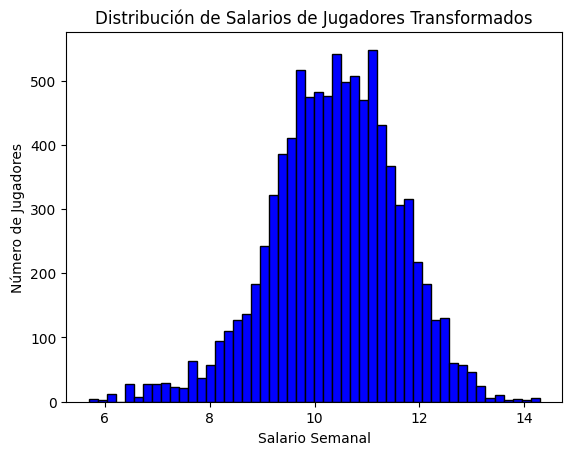

count    9168.000000
mean       10.376461
std         1.208463
min         5.693732
25%         9.616072
50%        10.432880
75%        11.204047
max        14.291502
Name: Salario semanal, dtype: float64


In [13]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Crea un histograma de los salarios
salarios = y_train_log

plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Transformados')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train_log.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

Ahora la distribución se asemeja mucho más a la distribución gaussiana, lo que puede ayudar al entrenamiento de los modelos y todos los percentiles están mucho más equilibrados, lo que ayuda a evitar que valores atípicos o extremos influyan más de lo debido en la construcción del modelo.

Observamos distribución de datos antes de tratar.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

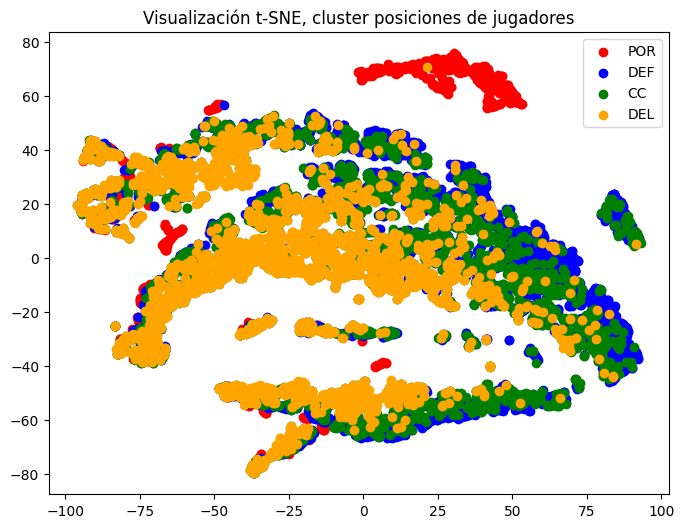

In [14]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train)

# Colores para cada condición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Podemos ver que el cluster independiente pertenece a los porteros.

Vamos a ver el cluster solo de porteros para observar más claramente como hay varios conjuntos claramente diferenciados

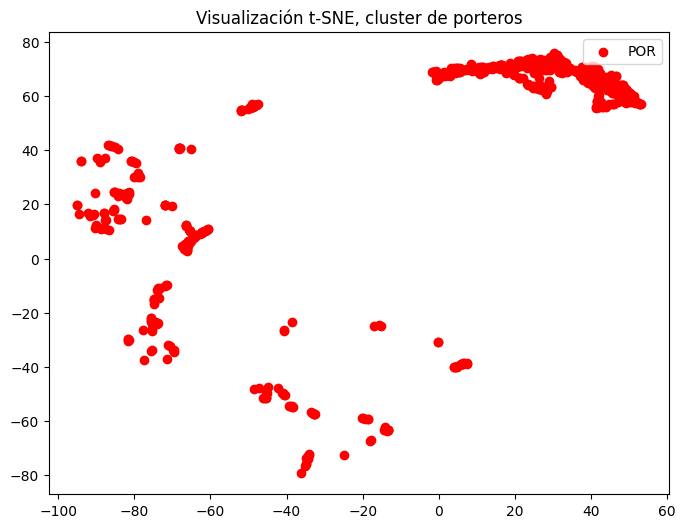

In [15]:
c1 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc='upper right')
plt.show()

Observamos un conjunto mayoritario y luego varios porteros más alejados, mi teoría tras haber observado tanto el digrama de caja como los percentiles es que esos porteros separados del cluster corresponden a los que mayor salario tienen, por lo que voy a añadir la condición de que solo se plotteen los porteros con un salario inferior a 300000 euros, que según he visto en el diagrama de barras de los porteros, es más o menos donde empieza el hueco entre el conjunto inferior mayoritario y los porteros que más cobran.

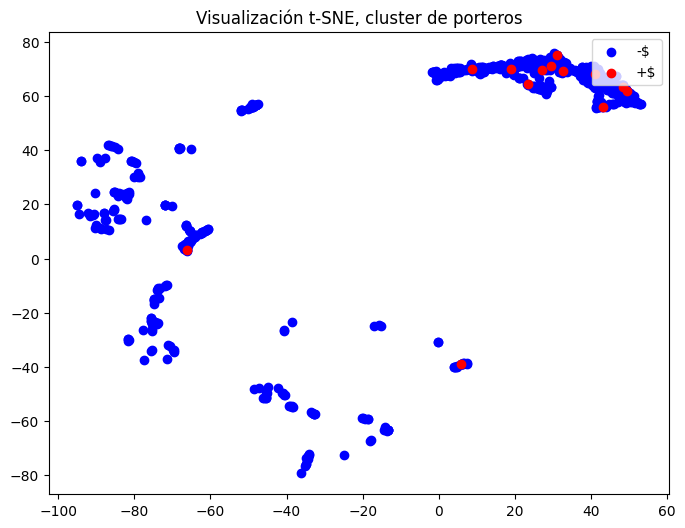

In [16]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (y_train > 300000)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para porteros que menos cobran
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="-$", c='blue')
# Scatter plot para porteros que más cobran
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="+$", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

La teoría no era correcta, entiendo entonces que los porteros anómalos son tal debido a que tienen unas estadísticas muy diferenciadas del resto.

Decido entonces volver a mostrar un resumen de los datos, pero solo de los porteros para ver si consigo sacar algo en claro.

In [17]:
# Crear un nuevo DataFrame con los porteros
porteros_df = x_train.loc[x_train['Posicion_1'] == True].copy()

print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(porteros_df[columna].mean(), 2)
    mediana = round(porteros_df[columna].median(), 2)
    desviacion_tipica = round(porteros_df[columna].std(), 2)
    maximo = round(porteros_df[columna].max(), 2)
    minimo = round(porteros_df[columna].min(), 2)
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = porteros_df[columna].count()
    rango_valores = f"{porteros_df[columna].min()} - {porteros_df[columna].max()}"
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                  Media   Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              27.94     28.00               4.57     41.0    17.0                0.0
Valor liga ini                  3253.75   3073.00            1387.33   6605.0  1598.0                0.0
Partidos                          20.28     23.00              14.05     38.0     1.0                0.0
Titularidades                     20.11     23.00              14.19     38.0     0.0                0.0
Minutos                         1808.81   2070.00            1268.81   3420.0     1.0                0.0
Goles                              0.00      0.00               0.04      1.0     0.0                0.0
Asistencias                        0.05      0.00               0.23      2.0     0.0                0.0
Goles penalti                      0.00      0.00               0.04      1.0     0.0                0.0
Penaltis lanz

Viendo esto vemos que hay porteros que han marcado goles, hecho asistencias o regateado, cosas que son poco comunes y tal vez sea lo que les separe del cluster de porteros, vamos a verlo.

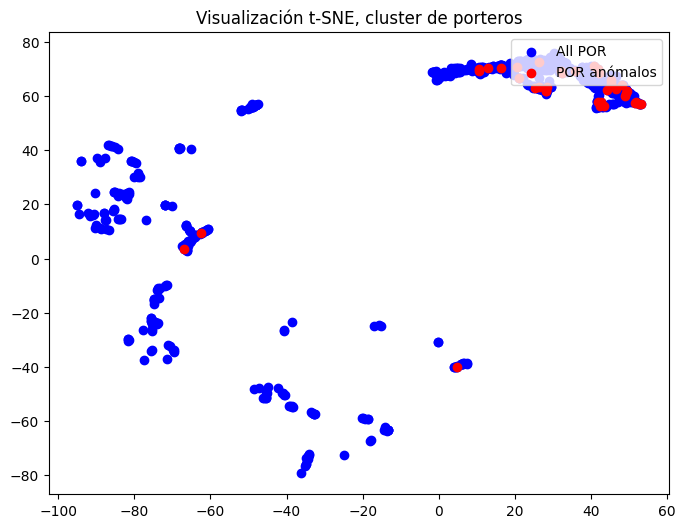

In [18]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & ((x_train['Goles'] > 0) | (x_train['Asistencias'] > 0))
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR anómalos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Tampoco es el caso, como no doy con lo que es decido ver a que datos pertenecen esos puntos más alejados para ver como son sus estadísticas, para ello como estos puntos tienen la peculiaridad de que su coordenada y es menor que 50 y la x menor que -20, uso esto para identificarlos.

In [19]:
# Guardamos las coordenadas
x_coord = X_tsne[:, 0]
y_coord = X_tsne[:, 1]

PORdf = c2.to_frame()
PORdf['X'] = x_coord
PORdf['Y'] = y_coord

# Filtrar las filas que cumplen con las condiciones
indices_filtrados = x_train[(PORdf['Y'] < 50) & (PORdf['X'] < -20) & (PORdf['Posicion_1'] == True)]

# Imprimir los porteros anómalos
indices_filtrados


,Edad,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,...,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
1002,29.0,5843.0,4.0,4.0,360.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5843.0,17.0,17.0,194.35,194.35,True,False,False,False
7470,23.0,2521.0,5.0,5.0,450.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2521.0,7.0,7.0,395.65,395.65,True,False,False,False
5121,24.0,1692.0,1.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1692.0,9.0,9.0,105.70,105.70,True,False,False,False
7265,18.0,2057.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2057.0,10.0,10.0,302.23,302.23,True,False,False,False
9176,25.0,3277.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3277.0,10.0,10.0,108.45,108.45,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,23.0,3300.0,7.0,7.0,630.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3300.0,2.0,2.0,923.45,923.45,True,False,False,False
2418,30.0,5498.0,7.0,7.0,630.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5498.0,10.0,11.0,511.20,430.75,True,False,False,False
9396,33.0,3149.0,1.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3149.0,10.0,10.0,236.80,236.80,True,False,False,False
9781,22.0,3277.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3277.0,1.0,1.0,770.75,770.75,True,False,False,False


Viendo el resultado parece que los porteros anómalos son porteros que han jugado pocos minutos, vamos a comprobarlo.

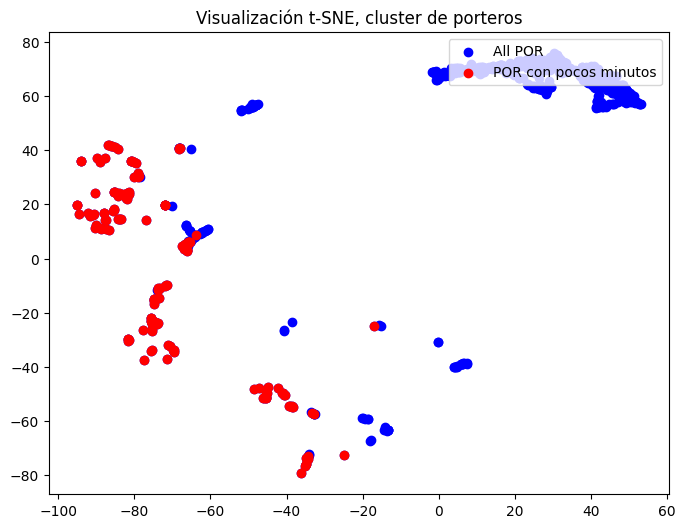

In [20]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (x_train['Minutos'] < 271)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR con pocos minutos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Queda confirmado que los porteros anómalos son porteros que han jugado pocos minutos, puede que se de el mismo problema para otras posiciones.

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas.

In [22]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                               Media  Mediana  Desviación Típica  Máximo  Mínimo
Edad                            0.40     0.38               0.16     1.0     0.0
Valor liga ini                  0.35     0.30               0.29     1.0     0.0
Partidos                        0.59     0.65               0.28     1.0     0.0
Titularidades                   0.48     0.47               0.29     1.0     0.0
Minutos                         0.47     0.48               0.28     1.0     0.0
Goles                           0.06     0.02               0.09     1.0     0.0
Asistencias                     0.08     0.05               0.11     1.0     0.0
Goles penalti                   0.02     0.00               0.06     1.0     0.0
Penaltis lanzados               0.02     0.00               0.07     1.0     0.0
Amarillas                       0.19     0.18               0.17     1.0     0.0
Rojas                           0.04     0.00               0.10   

Comprobar correlación de las variables continuas.

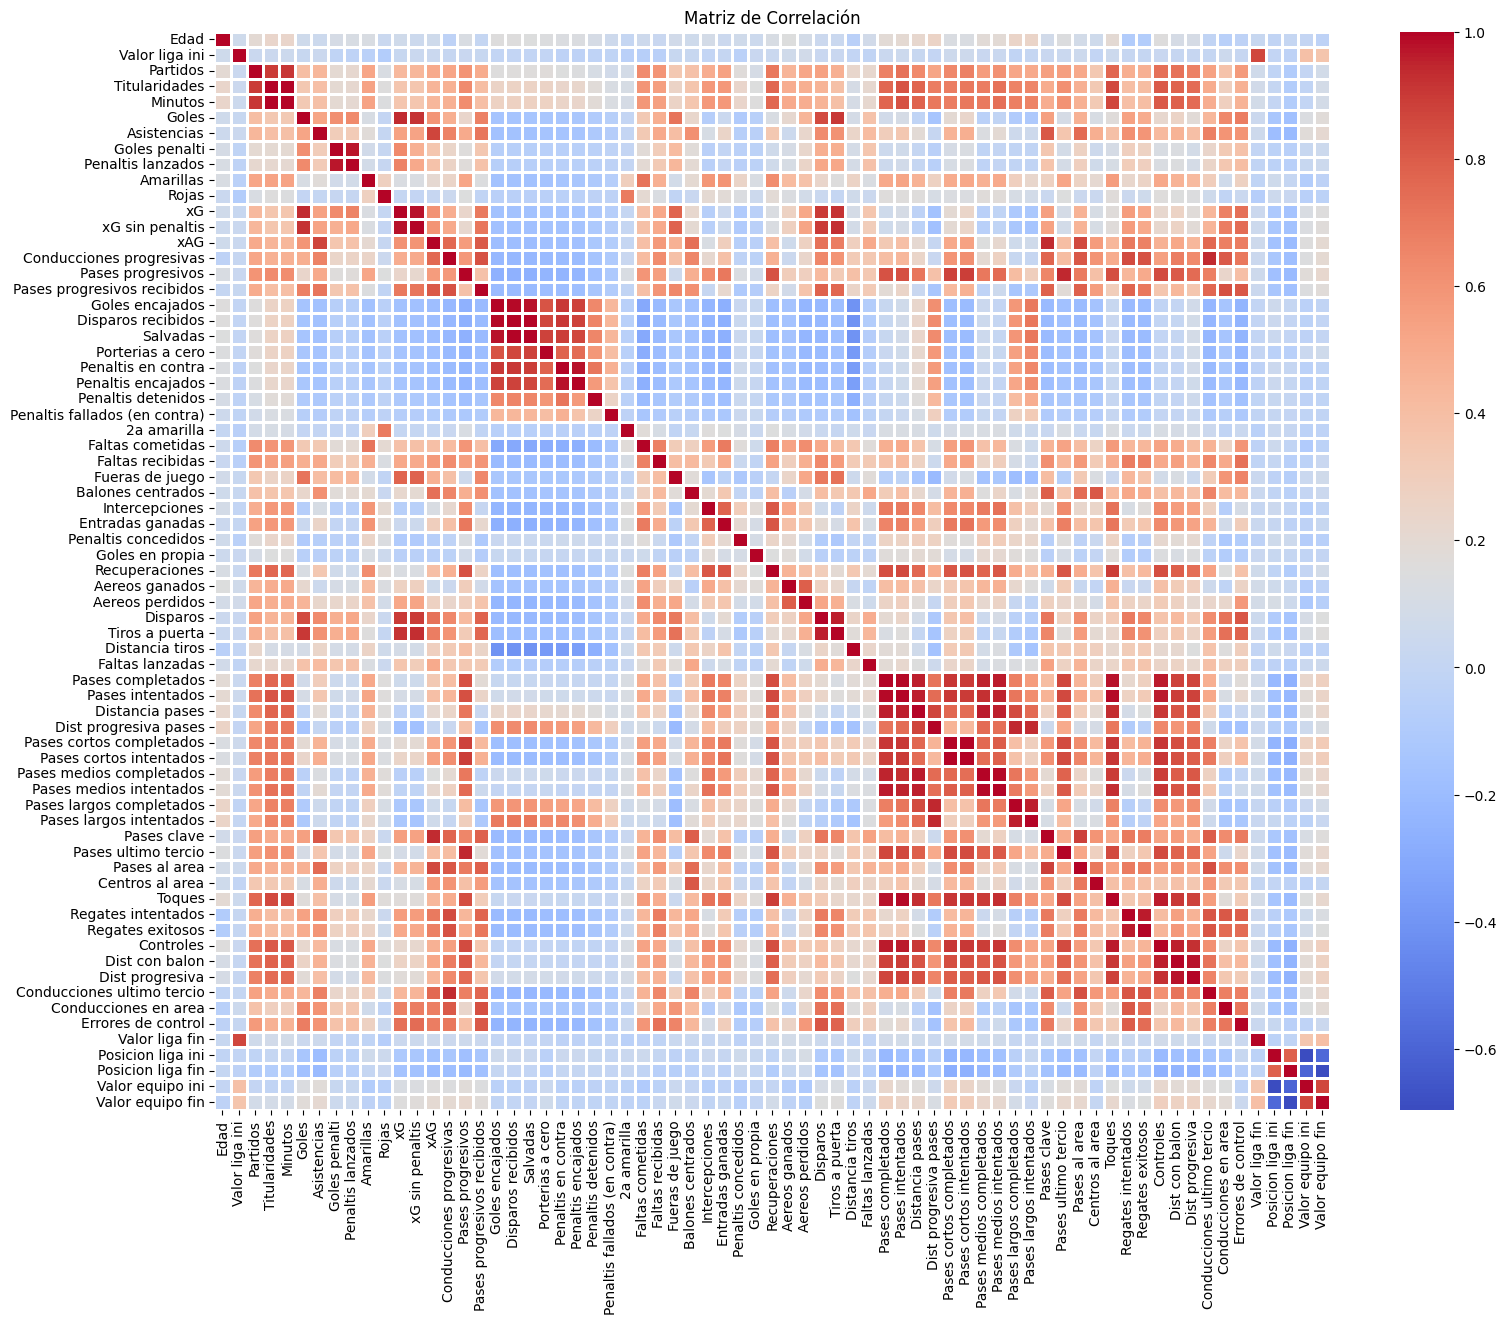

In [23]:
import seaborn as sns

# Calcula la matriz de correlación
matriz_correlacion = x_train[continuas_indices].corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(18, 14))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', linewidths=2)
plt.title('Matriz de Correlación')
plt.show()

In [24]:
# Encuentra parejas de características con alta correlación
umbral = 0.99

parejas_relacionadas = set()  # Usamos un conjunto para evitar duplicados
nombres_caracteristicas = matriz_correlacion.columns

for i in range(len(nombres_caracteristicas)):
    for j in range(i + 1, len(nombres_caracteristicas)):
        if abs(matriz_correlacion.iloc[i, j]) > umbral:
            pareja = (nombres_caracteristicas[i], nombres_caracteristicas[j])
            parejas_relacionadas.add(pareja)

# Imprime las parejas de características relacionadas
print("Parejas de características con correlación mayor a {}:".format(umbral))
for pareja in parejas_relacionadas:
    print(pareja)

Parejas de características con correlación mayor a 0.99:
('Titularidades', 'Minutos')
('Pases cortos completados', 'Pases cortos intentados')
('Pases medios completados', 'Pases medios intentados')
('Disparos recibidos', 'Salvadas')
('Pases intentados', 'Toques')


Selecciono un 99% de correlación ya que considero que eliminando una de estas variables se puede mantener prácticamente la totalidad de la información y conseguimos reducir la dimensionalidad del problema.

Variables correlacionadas:
* ('Titularidades', 'Minutos'): Es entendible la correlación, 1 titularidad suele equivaler a jugar entre 65' y 90'. Veo coherente entonces eliminar 'Titularidades', ya que su información está prácticamente implícita en 'Minutos'.
* ('Pases medios completados', 'Pases medios intentados'): Estas variables hacen referencia a la cantidad de pases de media distancia intentados y completados, la correlación puede deberse a que al final todos los futbolistas tienen una precisión similar para este tipo de pases, fallando así un porcentaje similar de pases y generandose así esta correlación. No obstante creo que mantener ambas variables puede ser bueno, ya que en este caso me gustaría mantener toda la información extra porque al final aunque los porcentajes de precisión sean similares, estos no son idénticos y es interesante que el modelo los tenga en cuenta.
* ('Pases cortos completados', 'Pases cortos intentados'): Misma explicación que las variables anteriores, solo que en este caso son pases cortos.
* ('Disparos recibidos', 'Salvadas'): En este caso se correlacionan los disparos a puerta rivales con las paradas, al final a más disparos a puerta haya más paradas se hará el portero, aunque al igual que con los pases es interesante guardar ambas métricas para que el modelo tenga en cuenta que porcentaje de esos disparos acaban en las manos del portero.
* ('Pases intentados', 'Toques'): Aquí se correlacionan el número de pases intentados por un jugador con el número de toques dado por el jugador, entiendo que por como es el fútbol hoy en día donde los jugadores no suelen retener mucho el balón y se suele controlar y pasar, se puede correlacionar ambas variables, aunque sigo creyendo que ambas proporcionan su propia información, por lo que no eliminaría ninguna de las dos.

In [25]:
# Eliminamos 'Titularidades' por estar correlacionada con 'Minutos'
x_train = x_train.drop('Titularidades', axis=1)
x_test = x_test.drop('Titularidades', axis=1)

continuas_indices.remove('Titularidades')

x_train.head()

,Edad,Valor liga ini,Partidos,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,Rojas,...,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
7881,0.307692,0.018774,0.567568,0.255338,0.170732,0.142857,0.0,0.0,0.117647,0.0,...,0.187919,0.018774,0.157895,0.176471,0.177525,0.168795,False,False,False,True
7899,0.153846,0.313561,0.081081,0.037145,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.013423,0.313561,0.789474,0.882353,0.097942,0.088367,False,True,True,False
6002,0.307692,0.847813,0.297297,0.108219,0.073171,0.047619,0.0,0.0,0.000000,0.0,...,0.060403,0.847813,0.052632,0.058824,0.974383,0.974111,False,False,False,True
1761,0.038462,0.060715,0.027027,0.006142,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.013423,0.060715,0.684211,0.764706,0.128170,0.118916,False,False,True,True
7872,0.307692,0.085480,0.783784,0.672126,0.195122,0.142857,0.0,0.0,0.235294,0.0,...,0.516779,0.085480,0.631579,0.705882,0.098796,0.089230,False,False,True,True


# 3. Procesado de los datos

Ahora vamos a aplicar el Análisis de Componentes Principales (PCA) sobre nuestras variables continuas para intentar reducir la dimensionalidad de nuestro conjunto de datos mientras se mantiene la información relevante de los datos originales.

He probado a usar FAMD, que es un equivalente de PCA que se puede aplicar tanto a variables categóricas como continuas, pero simplemente reducía a 51 características y no comprendía del todo su funcionamiento por lo que preferí usar PCA.

Cuando whiten se establece en True, PCA realiza una transformación adicional después de calcular los componentes principales. Esta transformación divide cada componente principal por la raíz cuadrada de su autovalor correspondiente. El resultado es que los componentes principales tendrán varianza unitaria, lo que puede ser útil en ciertas aplicaciones.

Por lo tanto, la opción whiten es útil cuando se desea que los componentes principales tengan varianza unitaria y es especialmente útil en aplicaciones donde la escala de las características es importante o donde se desea que los componentes principales tengan la misma escala para facilitar la interpretación.

Número de variables continuas:  68


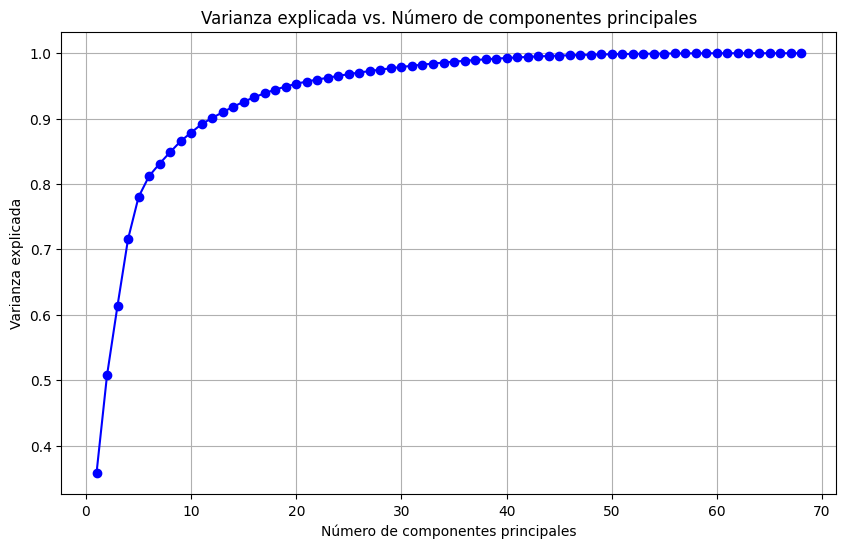

Varianza explicada:
[0.35767031 0.50742124 0.61408718 0.71582566 0.78015085 0.81206318
 0.83114482 0.84865304 0.86539943 0.87868816 0.89159129 0.9009659
 0.90979633 0.91811444 0.92583666 0.9326626  0.9388497  0.9443891
 0.94902206 0.95330616 0.95675251 0.95970896 0.96253642 0.96530587
 0.96798945 0.97051727 0.97276366 0.9749663  0.97697619 0.97894758
 0.98082332 0.98254942 0.98417439 0.9857179  0.98713266 0.98839791
 0.98959906 0.99073088 0.99177562 0.99269381 0.99353915 0.99433107
 0.99509162 0.99573577 0.99633111 0.99687208 0.99736801 0.99776345
 0.99812233 0.99847193 0.99874732 0.99895558 0.99915632 0.99932879
 0.99948644 0.99963004 0.99975727 0.99984383 0.99992526 0.99996213
 0.99997701 0.9999865  0.99999369 0.99999813 0.99999888 0.99999949
 1.         1.        ]


In [26]:
from sklearn.decomposition import PCA # para el PCA
import numpy as np

# Crear una instancia de PCA y ajustar los datos
pca = PCA(n_components=len(continuas_indices), whiten=True)
pca.fit(x_train[continuas_indices])

# Obtén la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calcula la varianza explicada acumulativa
cumulative_variance_explained = np.cumsum(variance_explained)

# Crea una lista con el número de componentes principales
num_components = range(1, len(variance_explained) + 1)


print("Número de variables continuas: ", len(continuas_indices))

# Grafica la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(num_components, cumulative_variance_explained, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada vs. Número de componentes principales')
plt.show()

print("Varianza explicada:")
print(cumulative_variance_explained)

En la siguiente gráfica podemos ver como va aumentando la varianza explicada dependiendo del número de variables con las que nos quedemos, cuando pasamos de doce a once variables podemos observar que empieza a disminuir drásticamente la varianza, podríamos elegir quedarnos con esas doce variables más reelevantes, el problema es que perdemos bastante varianza, lo ideal es poder suprimir variables pero sin sacrificar varianza, observando entonces la matriz de varianza explicada se puede observar que hasta 38 variables la varianza no baja del 99%, considero que con un 99% de la varianza apenas se pierde información y podemos reducir mucho la dimensión del problema, por lo que así procedo.

In [27]:
# Aplicar PCA como tal para quedarnos con 38 variables continuas
pca = PCA(n_components=38, whiten=True)
print('Características antes de aplicar PCA: ', len(x_train.columns))
pca.fit(x_train[continuas_indices])
x_transformada = pca.transform(x_train[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_train_pca = x_train.drop(continuas_indices, axis=1)
x_train_pca = pd.concat([x_train_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)

# Convertimos nombres de variables a string
x_train_pca.columns = x_train_pca.columns.astype(str)

print('Características tras aplicar PCA: ', len(x_train_pca.columns))
x_train_pca.head()

Características antes de aplicar PCA:  72
Características tras aplicar PCA:  42


,Posicion_1,Posicion_2,Posicion_3,Posicion_4,0,1,2,3,4,5,...,28,29,30,31,32,33,34,35,36,37
0,False,False,False,True,-0.690338,0.204875,-1.105688,-1.422163,0.648188,-0.664659,...,0.464802,0.171434,-0.250004,-0.927831,-0.614168,-0.158706,0.871479,-0.910925,1.543744,-0.189551
1,False,True,True,False,-1.658167,-0.550808,0.086810,0.489859,-0.501719,0.925804,...,0.243903,0.006804,0.181951,-0.188824,-0.228794,-0.129912,0.151756,0.085903,-0.006285,0.154473
2,False,False,False,True,-0.904491,3.076971,-0.046543,0.634798,-0.026160,-0.373424,...,0.324052,0.000817,0.082269,0.208221,0.471509,0.482721,-0.254736,-0.800664,0.267827,-0.081875
3,False,False,True,True,-1.748438,-0.578702,-0.032258,-0.523537,-0.514889,0.951215,...,0.132911,-0.075226,0.174758,-0.061344,-0.141442,0.030738,0.162265,-0.062663,0.032958,0.084779
4,False,False,True,True,0.138982,-1.079121,-1.677866,-0.123593,1.018513,0.108817,...,-1.509613,0.155481,0.643388,0.728381,1.183075,-1.160947,-1.280524,0.228140,0.544057,-0.104754


In [28]:
# Podemos ver cuanto aporta cada característica a las nuevas variables creadas por PCA
coeficientes = pca.components_
coeficientes[0]

array([ 4.12567163e-02,  3.37011968e-02,  3.28750496e-01,  3.37705653e-01,
        4.32808812e-02,  7.64798114e-02,  1.60736953e-02,  1.86640307e-02,
        1.36489583e-01,  2.38741333e-02,  4.88906888e-02,  4.78120197e-02,
        7.83183382e-02,  9.95440865e-02,  1.62381659e-01,  7.12857931e-02,
       -2.87413388e-03, -2.68004438e-03, -2.25965277e-03,  1.65856143e-04,
       -2.17706897e-03, -1.96161782e-03, -1.04456339e-03, -2.66560108e-04,
        2.38557673e-02,  1.49005269e-01,  8.76342705e-02,  2.69479454e-02,
        7.46572851e-02,  1.36136855e-01,  1.39660457e-01,  3.24179152e-02,
        1.22800809e-02,  2.23951015e-01,  5.87361876e-02,  6.35714720e-02,
        8.08738916e-02,  5.64240432e-02,  3.98038351e-02,  2.13258891e-02,
        2.16416434e-01,  2.27958139e-01,  1.88364303e-01,  9.85815769e-02,
        1.78192352e-01,  1.84619385e-01,  1.60369082e-01,  1.74240475e-01,
        9.32863908e-02,  7.57838980e-02,  1.08274555e-01,  1.53130595e-01,
        9.30785942e-02,  

Los coeficientes indican la dirección y la fuerza de la relación entre las variables originales y los componentes principales. Un valor positivo en un coeficiente indica una relación positiva entre la variable original y el componente principal, mientras que un valor negativo indica una relación negativa. La magnitud del coeficiente indica la importancia de la variable original en la creación del componente principal.

In [29]:
# Aplicamos también ahora la misma transformación de PCA a test con los factores de train
x_transformada = pca.transform(x_test[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_test_pca = x_test.drop(continuas_indices, axis=1)
x_test_pca = pd.concat([x_test_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)
x_test_pca.columns = x_test_pca.columns.astype(str)

Visualización de los datos (Reducción a 2D con sklearn.manifold.TSNE)

In [30]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train_pca)

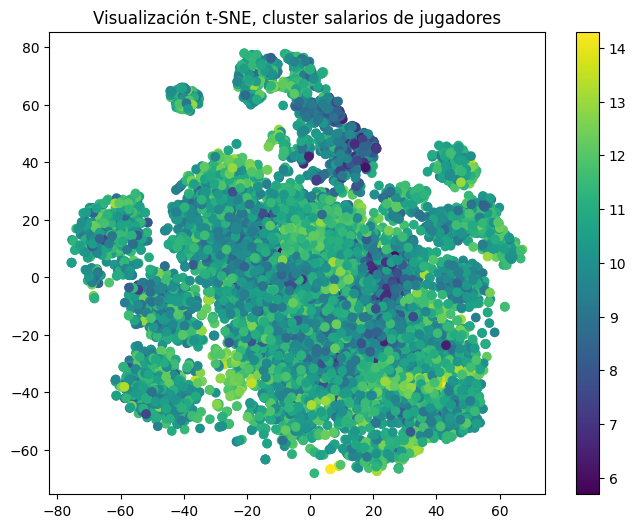

In [31]:
# Visualizamos los datos reducidos en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_log, cmap='viridis')
plt.title("Visualización t-SNE, cluster salarios de jugadores")
plt.colorbar()
plt.show()

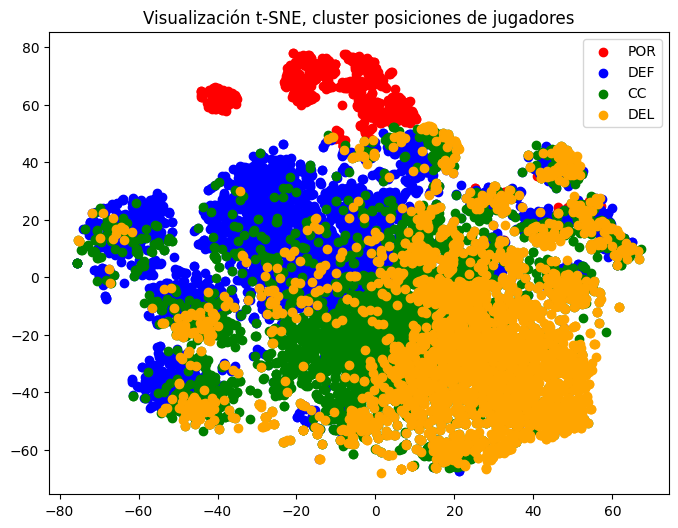

In [32]:
# Colores para cada condición
c1 = x_train_pca["Posicion_1"]
c2 = x_train_pca["Posicion_2"]
c3 = x_train_pca["Posicion_3"]
c4 = x_train_pca["Posicion_4"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Vemos como cada posición tiene su cluster, CC, DEL y varias posiciones como son más similares entre ellas están más entrecruzados sus clusters, en el caso de POR y DEF si se ve su cluster mejor definido. Aunque sigo sin ver el cluster totalmente independiente que se podía observar antes de normalizar. (ACTUALIZACIÓN: 24/10, tras graficar el conjunto antes de procesar los datos se puede observar mejor que el cluster independiente pertenece a los porteros).

# 4. Conjunto de hipótesis a usar y métricas de error

El primer modelo es Regresión Lineal, este es el modelo más comúnmente usado para problemas de regresión, algunas de sus ventajas son:

* Interpretación: La regresión lineal proporciona coeficientes que representan la contribución relativa de cada variable de entrada al resultado de la predicción. Esto permite una interpretación clara y comprensión de la relación entre las variables.

* Simplicidad: La regresión lineal es un modelo simple y fácil de implementar. No requiere una gran cantidad de ajustes de hiperparámetros y es relativamente rápido de entrenar.

* Buena opción inicial: La regresión lineal puede servir como un buen punto de partida para problemas de regresión. Proporciona una línea de base sólida para comparar con otros modelos más complejos y determinar si hay mejoras significativas.

Por otro lado sus desventajas son:

* Suposiciones restrictivas: La regresión lineal asume una relación lineal entre las características y la variable objetivo, lo que puede no ser cierto en todos los casos.
* Limitación en la captura de relaciones no lineales: La regresión lineal no es adecuada para capturar relaciones no lineales complejas en los datos sin transformaciones adicionales.
* Vulnerabilidad a valores atípicos: Los valores atípicos pueden influir significativamente en los coeficientes y afectar las predicciones de regresión lineal.

Por lo visto en la anterior gráfica creo que puede ser interesante probarlo, ya que tal vez encuentre alguna relación lineal, en cuanto a la influencia por los valores atípicos, con la transformación logarítmica de la variable a predecir solventamos ese problema, ya que ahora todos los datos están recogidos en un pequeño intervalo.

El siguiente modelo es KNN para regresión, sus ventajas son:

* Simplicidad: k-NN es un modelo simple de entender y de implementar. No requiere suposiciones sobre la distribución de los datos y es fácil de usar.
* Adaptabilidad: k-NN se adapta bien a relaciones no lineales en los datos, lo que lo hace efectivo para problemas con patrones no lineales.
* Robustez ante valores atípicos: k-NN puede ser resistente a valores atípicos, ya que se basa en la proximidad de los datos en lugar de en una relación lineal.

En cuanto a las desventajas, estas son:

* Alto costo computacional: Para predecir un nuevo punto, k-NN debe calcular las distancias a todos los puntos de datos en el conjunto de entrenamiento, lo que puede ser costoso en conjuntos de datos grandes.
* Sensibilidad a la elección de k: La elección del valor de k (número de vecinos) puede afectar significativamente las predicciones y debe seleccionarse con cuidado.
* Falta de interpretabilidad: k-NN no proporciona una interpretación fácil de los coeficientes o relaciones entre características, lo que puede dificultar la comprensión de cómo se llega a las predicciones.

Podemos reducir el alto coste computacional como hemos hecho escalando las variables, esto sumado a que el conjunto es pequeño, no creo que el tiempo de cómputo sea un problema, sin embargo la falta de interpretabilidad puede ser un importante problema, ya que la idea no es solo generar el modelo, sino conocer que variables influyen más en el sueldo de un futbolista.

Otro modelo interesante de probar es un Árbol de regresión, sus ventajas son:

* Interpretabilidad: Los árboles de regresión son altamente interpretables y fáciles de visualizar. Puedes seguir el árbol para comprender cómo se toman las decisiones de predicción.
* Manejo de variables categóricas: Los árboles de regresión pueden manejar tanto variables numéricas como categóricas sin requerir una codificación especial.
* Robustez ante valores atípicos: Los árboles son resistentes a valores atípicos y no se ven influenciados por ellos de la misma manera que los modelos basados en distancias.

Por otro lado sus desventajas son:

* Sobreajuste: Los árboles de regresión tienden a sobreajustarse a los datos, especialmente si se crecen demasiado profundamente. Se requieren técnicas de poda para mitigar este problema.
* Inestabilidad: Pequeños cambios en los datos de entrenamiento pueden llevar a árboles significativamente diferentes, lo que hace que los modelos sean inestables.
* Limitaciones en la captura de relaciones lineales: Los árboles no son ideales para capturar relaciones lineales complejas en los datos.

Su fácil interpretabilidad y explicabilidad lo hacen un modelo ideal para la tarea propuesta, será interesante también comparar sus resultados con los de KNN y observar cual proporciona mejores resultados, esto debido a las limitaciones del árbol de regresión para capturar relaciones complejas. También será importante tener cuidado con el sobreajuste.

En cuanto a las métricas de error, usaré las siguientes:
* MSE: Error cuadrático medio. Calcula el promedio de los errores al cuadrado entre los valores predichos y los valores reales, penalizando más los errores grandes.
* MAE: Error absoluto medio. Calcula el promedio de los errores absolutos entre los valores predichos y los valores reales sin considerar la magnitud de los errores.

Usando ambas métricas de forma conjunta podemos conocer si nuestro modelo predice mal muchas muestras por un intervalo pequeño (MSE = MAE, MAE un valor grande), predice mal pocas muestras por un intervalo grande (MSE > MAE, MAE un valor pequeño) o predice mal muchas muestras por un intervalo grande además (MSE > MAE, MAE un valor grande).

Para tener más claro como de bueno es el modelo también usaré el Coeficiente de determinación (R²), este mide la proporción de la variabilidad de la variable objetivo que es explicada por el modelo. R² toma valores entre 0 y 1, donde 1 indica una ajuste perfecto del modelo.

# 5. Discusión de parámetros y selección del mejor modelo

Extraemos el conjunto para poder probarlo en otros lados.

In [33]:
# Exporta el DataFrame a un archivo CSV
#x_train_pca.to_csv('csv/x_train_pca.csv', index=False)
#x_test_pca.to_csv('csv/x_test_pca.csv', index=False)
#y_train_log.to_csv('csv/y_train_log.csv', index=False)
#y_test_log.to_csv('csv/y_test_log.csv', index=False)

Inicializo Kfolds para hacer cross-validation.

In [34]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import metrics
from keras import callbacks

# Definir el objeto KFold con 5 folds
folds = 5
kf = KFold(n_splits=folds)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, train_stats=False):
  mae = 0
  mse = 0
  r2 = 0
  mae_tr = 0
  mse_tr = 0
  r2_tr = 0

  # Transformar los dataset a numpy
  x = dataset_x.to_numpy()
  y = dataset_y.to_numpy()

  for train_index, val_index in kFolds.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = x[train_index], x[val_index]
    train_y_fold, val_y_fold = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

    # Calcular errores para train
    if train_stats:
      pred_y = model.predict(train_x_fold)

      mse_tr += mean_squared_error(train_y_fold, pred_y)
      mae_tr += mean_absolute_error(train_y_fold, pred_y)
      r2_tr += r2_score(train_y_fold, pred_y)

  if train_stats:
    return model, mse/folds, mae/folds, r2/folds, mse_tr/folds, mae_tr/folds, r2_tr/folds
  else:
    return model, mse/folds, mae/folds, r2/folds

Como disponemos de bastantes datos indico que haya 5 folds, para tener un equilibrio entre seguridad, por haber validado con varios conjuntos, y tiempo de entrenamiento.

In [35]:
def graficaComparacion(valores, titulos, categorias):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title('Gráfica comparativa de métricas')

  # Mostrar el gráfico
  plt.show()

In [36]:
from tabulate import tabulate

def tablaComparacion(valores, categorias, titulos):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, 'Métricas de error')
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

### k-Nearest Neighbors (k-NN) para Regresión

Usaremos la clase KNeighborsRegressor de scikitlearn, sus distintos parámetros son:

* n_neighbors: Este parámetro representa el número de vecinos más cercanos que se utilizarán para estimar el valor de regresión para un nuevo punto de datos, un valor pequeño, como 1 o 3, hará que el modelo sea más sensible a las fluctuaciones en los datos y puede llevar a una predicción más ruidosa, por otro lado, un valor grande, como 10 o más, hará que el modelo sea más suave y robusto al ruido, ya que se basa en un mayor número de vecinos cercanos.

* weights: Permite ajustar el impacto de los vecinos en función de su distancia al punto de predicción. Hay dos opciones comunes para el parámetro:
> * 'uniform' (predeterminado): Si weights='uniform', todos los vecinos más cercanos tienen el mismo peso al realizar la predicción. En otras palabras, cada vecino contribuye igualmente a la predicción.
> * distance': Si weights='distance', los vecinos más cercanos tienen un peso inversamente proporcional a su distancia al punto de predicción. Cuanto más cerca esté un vecino, más influencia tendrá en la predicción. Este enfoque refleja la intuición de que los puntos cercanos son más similares y, por lo tanto, deben contribuir más a la predicción.

* algorithm: Este parámetro permite elegir el algoritmo utilizado para calcular los vecinos más cercanos cuando se realiza una predicción de regresión. De forma predeterminada está en auto, donde se elije automáticamente el algoritmo más adecuado para el problema en cuestión, lo dejaré así.

* p: se utiliza para controlar la métrica de distancia utilizada en el cálculo de los vecinos más cercanos. Esta métrica determina cómo se mide la distancia entre los puntos en el espacio de características. El valor de p está relacionado con la distancia de Minkowski, que es una métrica general que incluye varias métricas comunes de distancia como casos especiales. Dependiendo de la elección de p, puedes obtener diferentes métricas de distancia:
>* Cuando p = 1, se utiliza la distancia de Manhattan (también conocida como distancia L1). En este caso, la distancia entre dos puntos se calcula como la suma de las diferencias absolutas de sus coordenadas.
>* Cuando p = 2, se utiliza la distancia euclidiana (distancia L2). La distancia euclidiana es la distancia "en línea recta" entre dos puntos en el espacio de características.
>* Cuando p toma otros valores (por ejemplo, p = 3), se utiliza la distancia de Minkowski generalizada, que incluye tanto la distancia de Manhattan como la euclidiana como casos especiales.

**n_neighbors**

Probamos una serie de valores (3, 9, 15, 21), para ver que número de vecinos es el óptimo, recordar que elegir un bajo número de vecinos puede generar un modelo muy influenciado por ruido.

╒═════════════════════╤═════════════════╤═════════════════╤══════════════════╤══════════════════╕
│ Métricas de error   │   n_neighbors=3 │   n_neighbors=9 │   n_neighbors=15 │   n_neighbors=21 │
╞═════════════════════╪═════════════════╪═════════════════╪══════════════════╪══════════════════╡
│ MSE                 │        0.829381 │        0.735217 │         0.741562 │         0.75297  │
├─────────────────────┼─────────────────┼─────────────────┼──────────────────┼──────────────────┤
│ MAE                 │        0.711976 │        0.679647 │         0.687435 │         0.695057 │
├─────────────────────┼─────────────────┼─────────────────┼──────────────────┼──────────────────┤
│ R^2                 │        0.432052 │        0.496468 │         0.492176 │         0.484387 │
╘═════════════════════╧═════════════════╧═════════════════╧══════════════════╧══════════════════╛


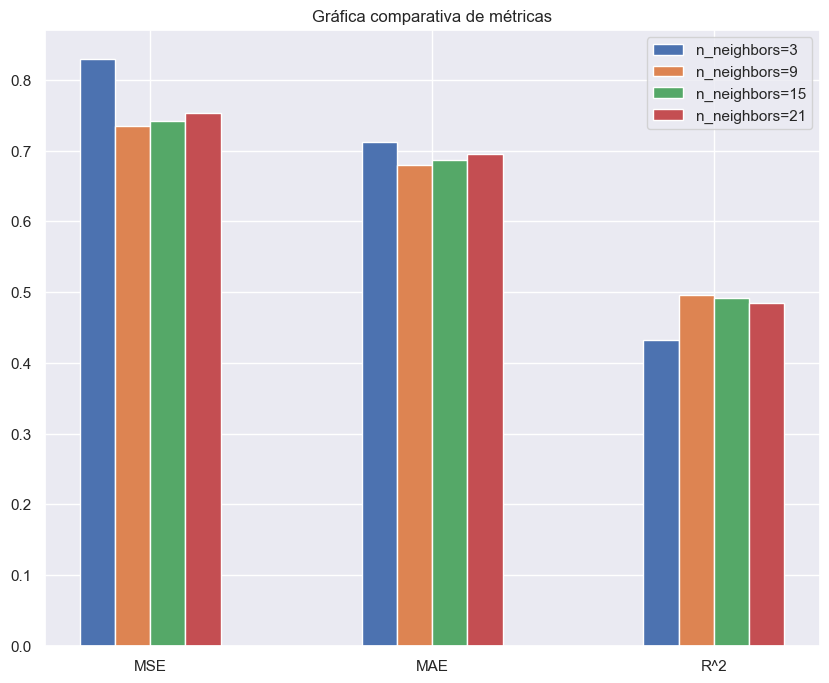

In [40]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
knn_1 = KNeighborsRegressor(n_neighbors=3)
knn_2 = KNeighborsRegressor(n_neighbors=9)
knn_3 = KNeighborsRegressor(n_neighbors=15)
knn_4 = KNeighborsRegressor(n_neighbors=21)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(knn_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(knn_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(knn_3, kf, x_train_pca, y_train_log)
result4 = crossValidation(knn_4, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2']
titulos = ['n_neighbors=3', 'n_neighbors=9', 'n_neighbors=15', 'n_neighbors=21']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Observamos que para 9 y 15 vecinos obtenemos los mejores resultados, estos son bastante similares, no obstante se aprecia que con 9 vecinos los resultados son ligeramente mejor.

**weights**

Probaremos entre los dos tipos antes comentados, 'uniform' y 'distance'

╒═════════════════════╤═════════════════════╤══════════════════════╕
│ Métricas de error   │   weights="uniform" │   weights="distance" │
╞═════════════════════╪═════════════════════╪══════════════════════╡
│ MSE                 │            0.735217 │             0.728987 │
├─────────────────────┼─────────────────────┼──────────────────────┤
│ MAE                 │            0.679647 │             0.676365 │
├─────────────────────┼─────────────────────┼──────────────────────┤
│ R^2                 │            0.496468 │             0.500737 │
╘═════════════════════╧═════════════════════╧══════════════════════╛


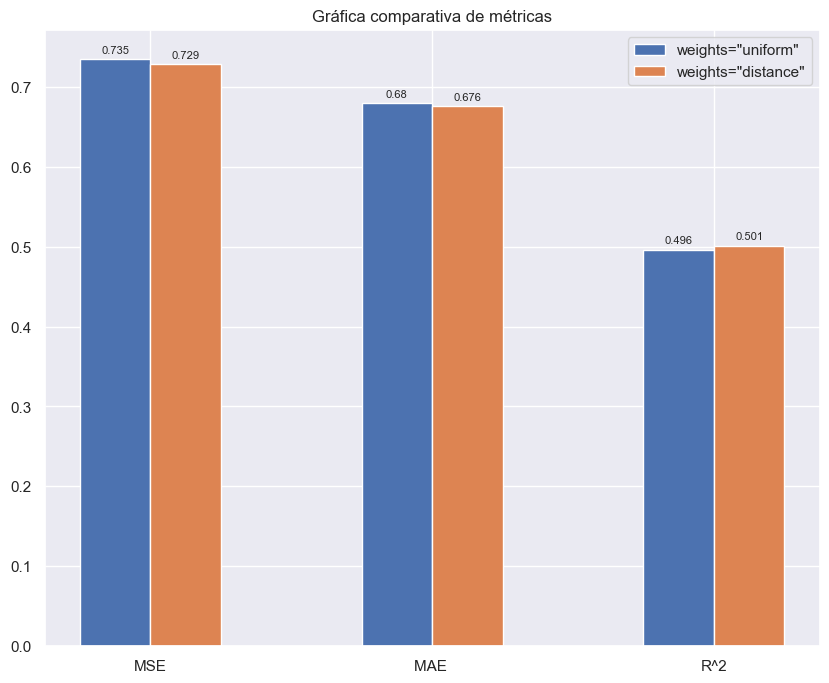

In [41]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
knn_1 = KNeighborsRegressor(n_neighbors=9, weights="uniform")
knn_2 = KNeighborsRegressor(n_neighbors=9, weights="distance")

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(knn_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(knn_2, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['weights="uniform"', 'weights="distance"']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Observamos que 'distance' es algo superior en todas las métricas, por lo que lo seleccionamos.

**p**

Probaremos los tres tipos de métrica de distancia.

╒═════════════════════╤══════════╤══════════╤══════════╕
│ Métricas de error   │      p=1 │      p=2 │      p=3 │
╞═════════════════════╪══════════╪══════════╪══════════╡
│ MSE                 │ 0.73591  │ 0.728987 │ 0.756628 │
├─────────────────────┼──────────┼──────────┼──────────┤
│ MAE                 │ 0.678975 │ 0.676365 │ 0.688509 │
├─────────────────────┼──────────┼──────────┼──────────┤
│ R^2                 │ 0.496099 │ 0.500737 │ 0.481819 │
╘═════════════════════╧══════════╧══════════╧══════════╛


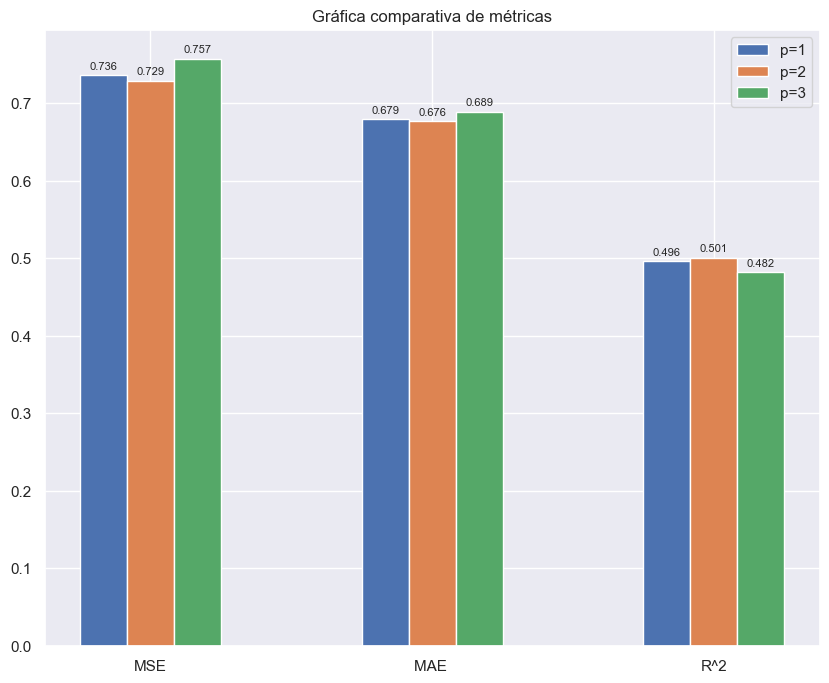

In [42]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
knn_1 = KNeighborsRegressor(n_neighbors=9, weights="distance", p=1)
knn_2 = KNeighborsRegressor(n_neighbors=9, weights="distance", p=2)
knn_3 = KNeighborsRegressor(n_neighbors=9, weights="distance", p=3)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(knn_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(knn_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(knn_3, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['p=1', 'p=2', 'p=3']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Al igual que antes tenemos un claro ganador, usando la distancia Manhattan obtenemos bastante mejores resultados que con las otras métricas, por lo que seleccionamos esa.

### Regresión lineal

Usaremos la clase SGDRegressor de scikitlearn, sus parámetros son:

*   penalty: Hace referencia al término de regularización, considero l1 como la mejor en este caso, por su característica de anular algunas variables y no tenerlas en cuenta, debido a la dimensionalidad del problema, no obstante probaré todos los tipos de regularización para compararlos.

*   loss: Se refiere a la función de pérdida a utilizar, usaremos'squared_error' para minimizar el MSE. Puede ser interesante usar <MARK>'epsilon_insensitive' para no contabilizar los errores que haya dentro de un margen.<MARK/>

*   alpha: Es el factor de regularización, a mayor alpha, con mayor fuerza se aplicará la regularización.

*   fit_intercept: Sirve para introducir un término para el sesgo, en nuestro caso lo ponemos a True ya que no queremos que nuestro modelo pase obligatoriamente por el origen. Ya está por defecto a True.

*   max_iter: Por defecto a 1000, solo las aumento si en esas 1000 no converge el modelo.

*   tol: Representa la tolerancia para el criterio de convergencia del algoritmo de optimización utilizado en el modelo. La tolerancia determina cuándo se considera que el algoritmo ha convergido. Si el cambio en la función objetivo entre dos iteraciones consecutivas es menor que la tolerancia, se considera que el algoritmo ha convergido y se detiene el entrenamiento.

*   learning_rate: Sirve para especificar si queremos que el learning rate sea constante o variable, para el variable existen varias opciones que usan distintas reglas de adaptación, dejaremos esta opción predeterminada.

*   eta0: Valor inicial para el learning rate.

*   early_stopping: Es un parámetro que permite utilizar la técnica de detención anticipada durante el entrenamiento del modelo.
Cuando early_stopping se establece en True, el modelo utilizará una porción de los datos de entrenamiento como conjunto de validación y controlará el rendimiento del modelo en este conjunto en cada época de entrenamiento. Si el rendimiento del modelo en el conjunto de validación deja de mejorar durante un número consecutivo de épocas especificado por el parámetro n_iter_no_change, entonces el entrenamiento se detiene y el modelo se devuelve con los parámetros que obtuvieron el mejor rendimiento en el conjunto de validación. Como nosotros ya usamos CV donde usamos una parte de training como validación dejaremos el parámetro a False.

*   n_iter_no_change: Número de iteraciones sin mejorar el ajuste a esperar antes de parar dicho ajuste, por defecto a 5.

**penalty**

Probaré los tres tipos de regularización, 'l1', 'l2' y 'elasticnet'.

╒═════════════════════╤══════════════╤══════════════╤══════════════════════╕
│ Métricas de error   │   penalty=l1 │   penalty=l2 │   penalty=elasticnet │
╞═════════════════════╪══════════════╪══════════════╪══════════════════════╡
│ MSE                 │     0.598149 │     0.598541 │             0.598381 │
├─────────────────────┼──────────────┼──────────────┼──────────────────────┤
│ MAE                 │     0.600944 │     0.601187 │             0.6011   │
├─────────────────────┼──────────────┼──────────────┼──────────────────────┤
│ R^2                 │     0.590441 │     0.590171 │             0.590281 │
╘═════════════════════╧══════════════╧══════════════╧══════════════════════╛


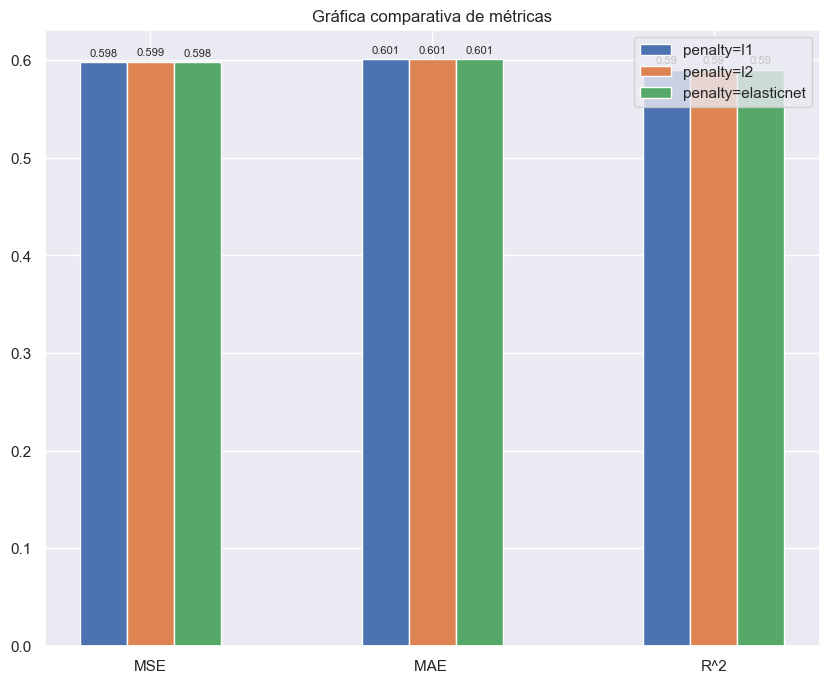

In [37]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
lineal_1 = SGDRegressor(penalty='l1', random_state=34)
lineal_2 = SGDRegressor(penalty='l2', random_state=34)
lineal_3 = SGDRegressor(penalty='elasticnet', random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(lineal_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(lineal_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(lineal_3, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['penalty=l1', 'penalty=l2', 'penalty=elasticnet']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Los resultados son muy similares, de hecho los de l2 y elasticnet son prácticamente idénticos, es probable que en la mezcla de uso que hace elasticnet use bastante l2, elijo al final l1 que es algo superior a l2.

**alpha**

Probamos con un rango de valores de distintas escalas, desde 0.0001 hasta 1.

╒═════════════════════╤════════════════╤═══════════════╤══════════════╤═════════════╤══════════════╕
│ Métricas de error   │   alpha=0.0001 │   alpha=0.001 │   alpha=0.01 │   alpha=0.1 │      alpha=1 │
╞═════════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╪══════════════╡
│ MSE                 │       0.598149 │      0.596092 │     0.590786 │    0.70039  │  1.46038     │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼──────────────┤
│ MAE                 │       0.600944 │      0.599649 │     0.595807 │    0.641872 │  0.953057    │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼──────────────┤
│ R^2                 │       0.590441 │      0.591852 │     0.595493 │    0.520333 │ -0.000186949 │
╘═════════════════════╧════════════════╧═══════════════╧══════════════╧═════════════╧══════════════╛


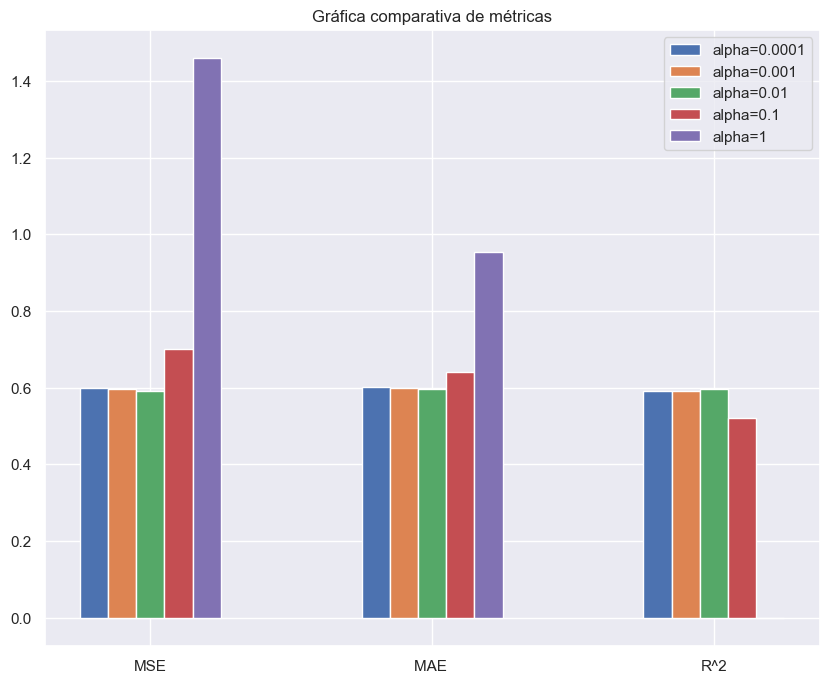

In [38]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
lineal_1 = SGDRegressor(penalty='l1', alpha=0.0001, random_state=34)
lineal_2 = SGDRegressor(penalty='l1', alpha=0.001, random_state=34)
lineal_3 = SGDRegressor(penalty='l1', alpha=0.01, random_state=34)
lineal_4 = SGDRegressor(penalty='l1', alpha=0.1, random_state=34)
lineal_5 = SGDRegressor(penalty='l1', alpha=1, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(lineal_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(lineal_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(lineal_3, kf, x_train_pca, y_train_log)
result4 = crossValidation(lineal_4, kf, x_train_pca, y_train_log)
result5 = crossValidation(lineal_5, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3, result4, result5))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['alpha=0.0001', 'alpha=0.001', 'alpha=0.01', 'alpha=0.1', 'alpha=1']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Seleccionamos 0.01, ya que con este valor obtenemos los mejores resultados. Así mismo nos protegemos más del sobreajuste, que si seleccionamos un valor menor.

**tol**

Probaremos a reducir su valor para comprobar si el modelo tiene aún margen de mejora.

╒═════════════════════╤════════════╤══════════════╤═══════════════╤════════════╕
│ Métricas de error   │   original │   tol=0.0001 │   tol=0.00001 │   tol=None │
╞═════════════════════╪════════════╪══════════════╪═══════════════╪════════════╡
│ MSE                 │   0.590786 │     0.593473 │      0.59321  │   0.59123  │
├─────────────────────┼────────────┼──────────────┼───────────────┼────────────┤
│ MAE                 │   0.595807 │     0.596776 │      0.596604 │   0.595172 │
├─────────────────────┼────────────┼──────────────┼───────────────┼────────────┤
│ R^2                 │   0.595493 │     0.593642 │      0.593827 │   0.595182 │
╘═════════════════════╧════════════╧══════════════╧═══════════════╧════════════╛


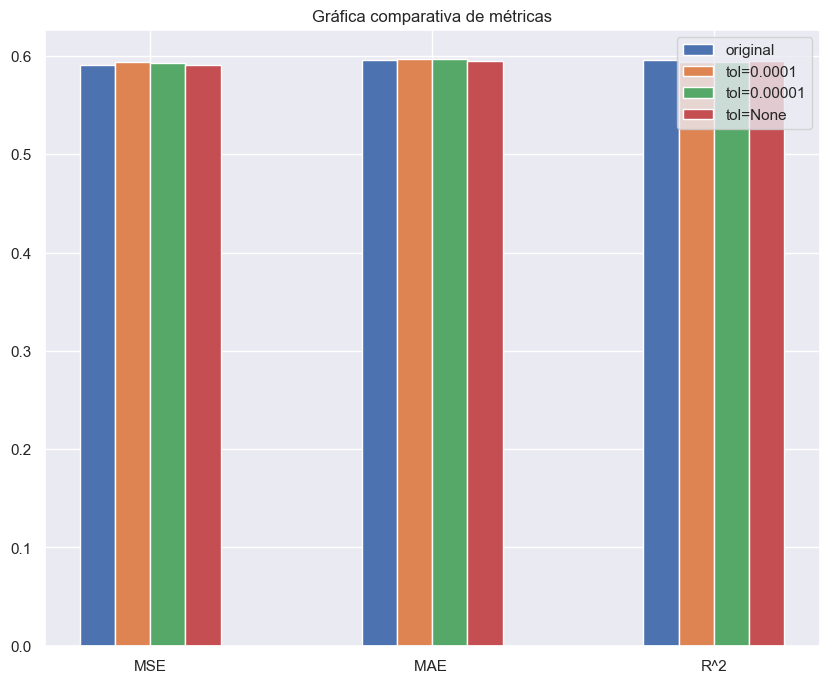

In [39]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
lineal_1 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.001, random_state=34)
lineal_2 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.0001, random_state=34)
lineal_3 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.00001, random_state=34)
lineal_4 = SGDRegressor(penalty='l1', alpha=0.01, tol=None, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(lineal_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(lineal_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(lineal_3, kf, x_train_pca, y_train_log)
result4 = crossValidation(lineal_4, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['original', 'tol=0.0001', 'tol=0.00001', 'tol=None']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Para todos los valores obtenemos resultados similares. Pero con la opción original son un poco mejores, por lo que selecciono esa.

**eta0**

Probamos un rango de valores de distintas escalas entre 0.001 y 10.

╒═════════════════════╤══════════════╤═════════════╤════════════╕
│ Métricas de error   │   eta0=0.001 │   eta0=0.01 │   eta0=0.1 │
╞═════════════════════╪══════════════╪═════════════╪════════════╡
│ MSE                 │     0.689536 │    0.590786 │   0.638284 │
├─────────────────────┼──────────────┼─────────────┼────────────┤
│ MAE                 │     0.650835 │    0.595807 │   0.621343 │
├─────────────────────┼──────────────┼─────────────┼────────────┤
│ R^2                 │     0.527859 │    0.595493 │   0.562887 │
╘═════════════════════╧══════════════╧═════════════╧════════════╛


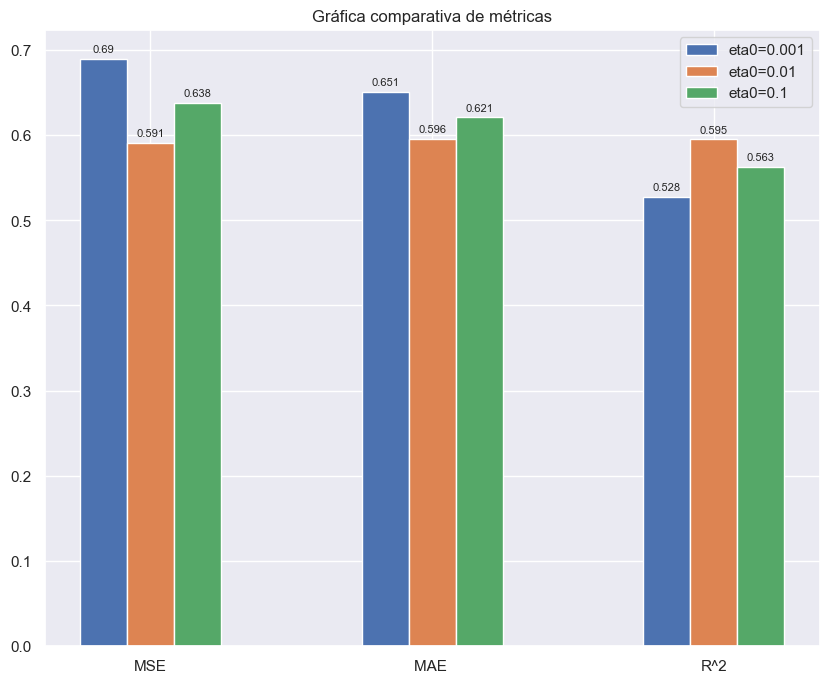

In [40]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
lineal_1 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.001, eta0=0.001, random_state=34)
lineal_2 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.001, eta0=0.01, random_state=34)
lineal_3 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.001, eta0=0.1, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(lineal_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(lineal_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(lineal_3, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['eta0=0.001', 'eta0=0.01', 'eta0=0.1']

tablaComparacion(all_result[:, 1:4], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias)

Para eta0=1 o 10 los resultados son horribles, asi que los elimino directamente, por otro lado para eta0=0.001 necesitamos más iteraciones para unos resultados similares a los de eta0=0.01, por lo que como conclusión el valor ideal era el que tenía por defecto.

### Random Forest

Usaré la clase de scikit-learn RandomForestRegressor, en cuanto a los parámetros, estos son:

* n_estimators: Número de árboles totales a generar, a más árboles mayor robustez frente al sobreajuste.

* criterion: Es una opción que te permite especificar la medida de calidad utilizada para evaluar la calidad de una división en el árbol de decisión. En otras palabras, el criterion determina cómo se eligen las divisiones de los nodos del árbol. Podemos usar 'squared_error' como en el caso de RL, o podemos en este caso usar 'absolute_error', debido al tipo de problema, donde prefiero que haya muchos errores pequeños a pocos grandes usaré 'squared_error', para reducir el MSE.

* splitter: Se utiliza para especificar la estrategia utilizada para seleccionar la división en un nodo interno durante la construcción de un árbol de decisión. En particular, splitter determina si se selecciona la división de manera "best" (mejor) o "random" (aleatoria). Como no tenemos muchos datos y dudo que el tiempo de cómputo se eleve mucho elijo "best".

* max_depth: Profundidad máxima del árbol, por defecto None, a menos que el tiempo de ejecución sea muy grande no modificaré este parámetro.

* min_samples_split: Mínimo de muestras para dividir el nodo, por defecto a 2, tampoco lo modificaré a menos que el tiempo de cómputo lo requiera. Podemos tener problemas de sobreajuste eso sí, hay que tener eso muy en cuenta.

* min_samples_leaf: Mínimo de muestras para considerar un nodo una hoja, por defecto a 1.

* max_features: Controla el número máximo de características que se consideran al realizar una división en un nodo. Esto implica limitar la cantidad de características que el algoritmo evaluará para determinar la mejor división. None equivale a usar todas las características, que es lo que viene por defecto, pero debido al peligro de sobreajuste, probaré todas las opciones para comparar resultados.

* max_leaf_nodes: Máximo de nodos hoja, por defecto None.

* Bootstrap: El parámetro "bootstrap" en el modelo RandomForest de scikit-learn es una configuración que determina si se debe utilizar o no el muestreo con reemplazo durante la construcción de cada árbol en el bosque aleatorio. Lo dejamos a True por defecto.

**n_estimators**

Seleccionamos un rango de valores entre 20 y 500, más o menos.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╡
│ MSE                 │            0.537337 │            0.519818 │             0.51512  │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ MAE                 │            0.561753 │            0.550214 │             0.546589 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ R^2                 │            0.631983 │            0.643995 │             0.647212 │
╘═════════════════════╧═════════════════════╧═════════════════════╧══════════════════════╛


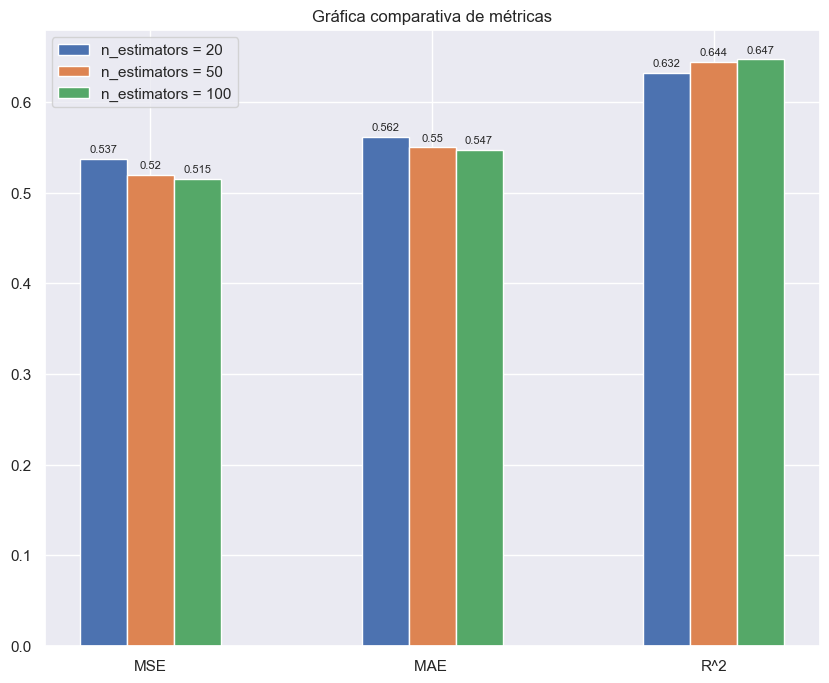

In [41]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 20, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 100, random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result, titulos, categorias)


Ahora los resultados si son más acordes a los de los otros modelos, en cuanto a que número de árboles elegir, a más árboles mayor exactitud, no obstante computacionalmente es muy costoso ir elevando el número de árboles (de hecho elimino la prueba de 250 y 500 árboles, tardaba unos 6 minutos) y no sale a cuenta con la mejora que se obtiene, se puede observar que de 50 a 100 árboles no hay mejoras significativas y se tarda el doble. Por tanto selecciono 50 árboles.

**max_features**

Probaré todas las opciones posibles, None, 'auto'(se indica como =1.0), 'sqrt' y 'log2'.

╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=None │   max_features=auto │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │            0.519818 │            0.519818 │            0.556652 │            0.571443 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │            0.550214 │            0.550214 │            0.57376  │            0.584689 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │            0.643995 │            0.643995 │            0.618791 │            0.608638 │
╘═════════════════════╧═════════════════════╧═════════════════════╧═════════════════════╧═══════════════

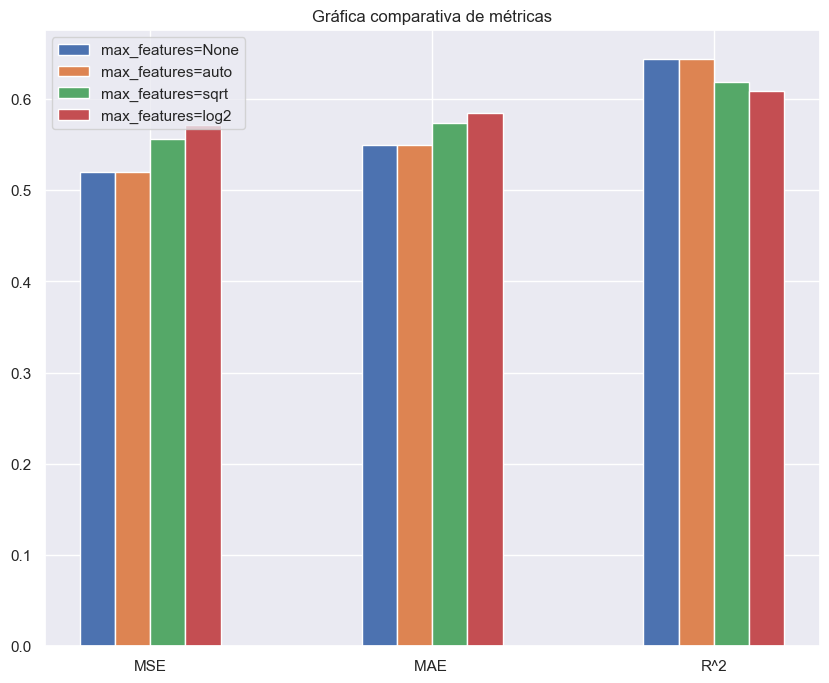

In [42]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 50, max_features=None, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, max_features=1.0, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 50, max_features='sqrt', random_state=34, n_jobs=-1)
tree_4 = RandomForestRegressor(n_estimators = 50, max_features='log2', random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log)
result4 = crossValidation(tree_4, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['max_features=None', 'max_features=auto', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result, titulos, categorias)

Seleccionamos 'auto' que obtiene los mejores resultados.

**max_depth**

Este parámetro es muy sensible y vital a la hora de generar un árbol con mayor o menor sobreajuste. La estrategia a seguir será ver cuantos niveles tienen los árboles ya generados y en función de ese valor probar varios valores menores para ver como funciona mejor.

In [43]:
# Accede a los árboles individuales del bosque
arboles = tree_2.estimators_

# Inicializa listas para almacenar las profundidades de los árboles
profundidades = []

# Itera a través de los árboles y registra sus profundidades
for arbol in arboles:
    profundidades.append(arbol.get_depth())

# Calcula la profundidad media y máxima
profundidad_media = sum(profundidades) / len(profundidades)
profundidad_maxima = max(profundidades)

print(f"Profundidad Media: {profundidad_media}")
print(f"Profundidad Máxima: {profundidad_maxima}")

Profundidad Media: 28.34
Profundidad Máxima: 33


╒═════════════════════╤══════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max_depth=None │   max_depth=27 │   max_depth=23 │   max_depth=17 │   max_depth=12 │   max_depth=9 │   max_depth=7 │
╞═════════════════════╪══════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╡
│ MSE                 │         0.519818 │       0.519535 │       0.5197   │       0.519948 │       0.522661 │      0.534544 │      0.558335 │
├─────────────────────┼──────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼───────────────┼───────────────┤
│ MAE                 │         0.550214 │       0.550161 │       0.550078 │       0.550185 │       0.551649 │      0.557627 │      0.571415 │
├─────────────────────┼──────────────────┼────────────────┼────────────────┼────────────────┼────────────────┼───────────────┼───────────────┤

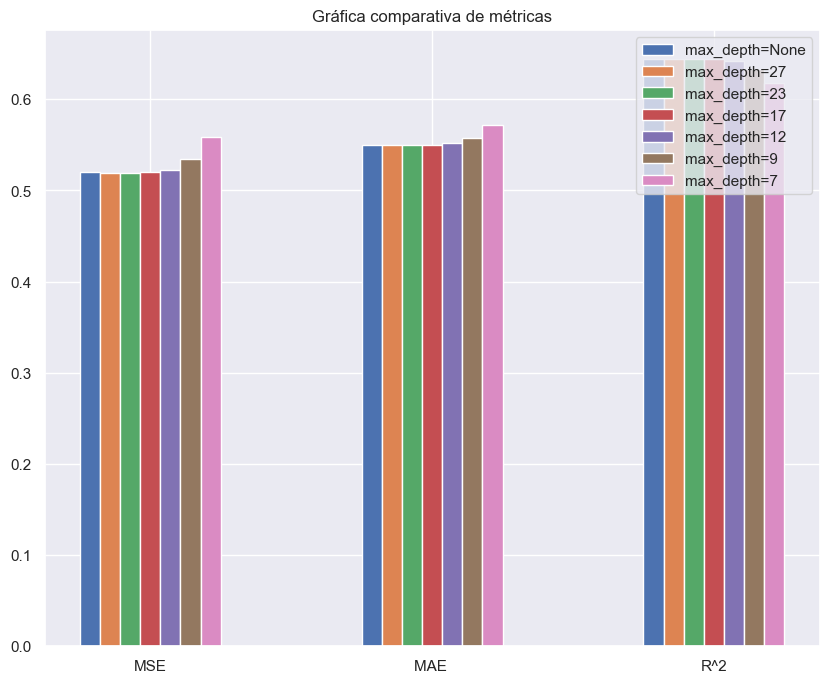

In [44]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
tree_1 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=None, random_state=34, n_jobs=-1)
tree_2 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=27, random_state=34, n_jobs=-1)
tree_3 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=23, random_state=34, n_jobs=-1)
tree_4 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=17, random_state=34, n_jobs=-1)
tree_5 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=12, random_state=34, n_jobs=-1)
tree_6 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=9, random_state=34, n_jobs=-1)
tree_7 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=7, random_state=34, n_jobs=-1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(tree_1, kf, x_train_pca, y_train_log)
result2 = crossValidation(tree_2, kf, x_train_pca, y_train_log)
result3 = crossValidation(tree_3, kf, x_train_pca, y_train_log)
result4 = crossValidation(tree_4, kf, x_train_pca, y_train_log)
result5 = crossValidation(tree_5, kf, x_train_pca, y_train_log)
result6 = crossValidation(tree_6, kf, x_train_pca, y_train_log)
result7 = crossValidation(tree_7, kf, x_train_pca, y_train_log)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:], result6[1:], result7[1:]))

categorias = ['MSE', 'MAE ', 'R^2']
titulos = ['max_depth=None', 'max_depth=27', 'max_depth=23', 'max_depth=17', 'max_depth=12', 'max_depth=9', 'max_depth=7']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result, titulos, categorias)

En el caso de RF al ser un gran conjunto de árboles se autoregula solo y no influye tanto la profundidad máxima, no obstante con una profundidad máxima de 12 los resultados son similares a no tener profundidad máxima, por lo que seleccionamos 12 para protegernos así de posible sobreajuste.

### Random Forest entrenamiento progresivo

Utilizamos progresivamente más datos, es decir, vamos incrementando el
número de ejemplos de entrenamiento para ver si el sobreajuste va disminuyendo, eso nos daría una idea/intuición de que el problema viene de que tenemos pocos datos.

In [45]:
# Utiliza train_test_split para separar el 15% de las filas para el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(x_train_pca, y_train_log, test_size=0.15, random_state=0)

# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

tree_1 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=12, random_state=34, n_jobs=-1)

for i in range(99):
  # Usamos de nuevo la función train_test_split, pero en vez de dividirme en train y test me irá dividiendo "test" cada vez en mayor tamaño que usaré como mini conjunto de train
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(X_train, y_train, test_size=(i+1)*0.01, random_state=0)

  tree_1.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = tree_1.predict(X_subtrain)
  pred_y_val = tree_1.predict(X_val)

  # Calculo los errores
  Ein = r2_score(y_subtrain, pred_y_subtrain)
  Eout = r2_score(y_val, pred_y_val)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
tree_1.fit(X_train, y_train)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = tree_1.predict(X_train)
pred_y_val = tree_1.predict(X_val)

# Calculo los errores
Ein = r2_score(y_train, pred_y_train)
Eout = r2_score(y_val, pred_y_val)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

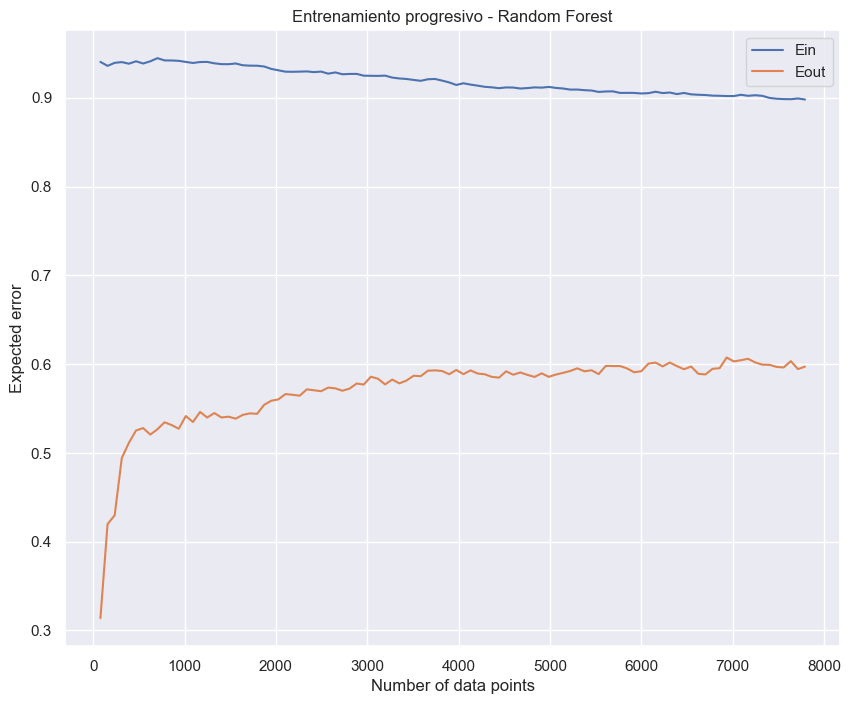

In [46]:
# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')

# Agregar etiquetas y leyenda
plt.title('Entrenamiento progresivo - Random Forest')
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.legend()

# Mostrar la gráfica
plt.show()

Puede que sigamos teniendo datos insuficientes o tal vez es que RF está sobreajustando mucho, probaré otros modelos a ver los resultados.

### Gradient Boosting

Debido al problema de sobreajuste por la falta de datos, elegimos para entrenar Gradient Boosting, este es un modelo especialmente útil cuando se trabaja con weak learners, ya que construye un conjunto fuerte de modelos a partir de modelos débiles, mejorando continuamente las predicciones mediante la corrección de los errores de los modelos anteriores.

Sus parámetros son los siguientes:

* loss: Es la función de pérdida a ser optimizada, usaremos 'huber' que es una mezcla entre el MSE y el MAE que al final son las métricas de error que hemos seleccionado.

* n_estimators: Número de weak learners o árboles a generar.

* learning_rate: Su principal función es regular la contribución de cada árbol base en el conjunto final.

* subsample: Controla la fracción de las muestras que se utilizan para entrenar cada árbol base en el proceso de Gradient Boosting. Un valor de 1.0 significa que se utilizan todas las muestras, mientras que un valor menor reduce la cantidad de datos utilizados para entrenar cada árbol.

* criterion: Algoritmo a usar para hacer los splits en los nodos, usaremos 'friedman_mse' al igual que en RF, que aparte es la opción por defecto y la mejor en la mayoría de casos.

* min_samples_split: Número mínimo de muestras para dividir un nodo. Al tener pocos datos un valor pequeño suele ser lo correcto, por lo que lo dejaré por defecto (2).

* min_samples_leaf: Número mínimo de muestras para ser un nodo terminal. Al igual que min_samples_split lo suyo es que sea un valor pequeño, lo dejo por defecto (1).

* min_weight_fraction_leaf: Este parámetro controla la cantidad mínima de peso total de las muestras requerido en un nodo hoja y es especialmente relevante cuando se trabaja con conjuntos de datos en los que algunas muestras tienen una importancia significativamente mayor que otras. Como no es nuestro caso no lo modificaré.

* max_depth: Profundidad máxima hasta la que pueden crecer los árboles. Por defecto es 3.

* min_impurity_decrease: Este parámetro controla cuánto debe disminuir la impureza en un nodo para que se realice una división durante la construcción del árbol. Ya hemos visto que cual es la profundidad del árbol ideal, por lo que dejaré este parámetro por defecto.

* init: Este parámetro se utiliza para especificar el estimador base inicial que se utilizará en la primera iteración del algoritmo de boosting. El estimador base inicial suele ser un árbol de decisión simple, como un "decision stump". Dejamos este por defecto ya que al final el usar un weak learner el cual presenta sesgo elevado y baja varianza es el motivo de probar Gradient Boosting.

* max_features: Número de variables a tener en cuenta al hacer el split.


**n_estimators**

Por lo general a mayor número mejores resultados, aunque hay que encontrar el equilibrio entre mejora y tiempo de cómputo invertido.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │   n_estimators = 200 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪══════════════════════╡
│ MSE                 │            0.660116 │            0.538901 │             0.503015 │             0.489236 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ MAE                 │            0.619433 │            0.557072 │             0.537818 │             0.530318 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ R^2                 │            0.547872 │            0.63099  │             0.65559  │             0.66501  │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────

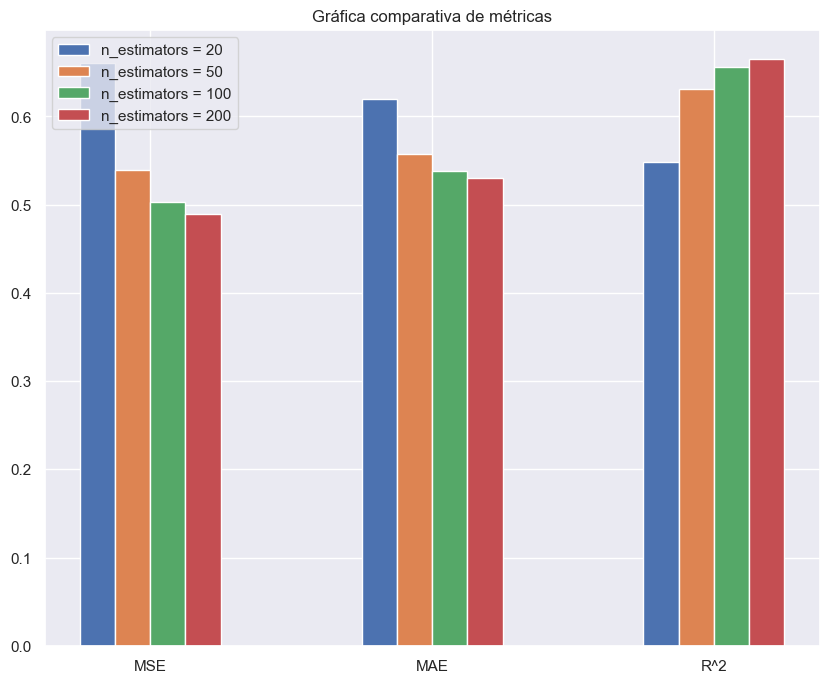

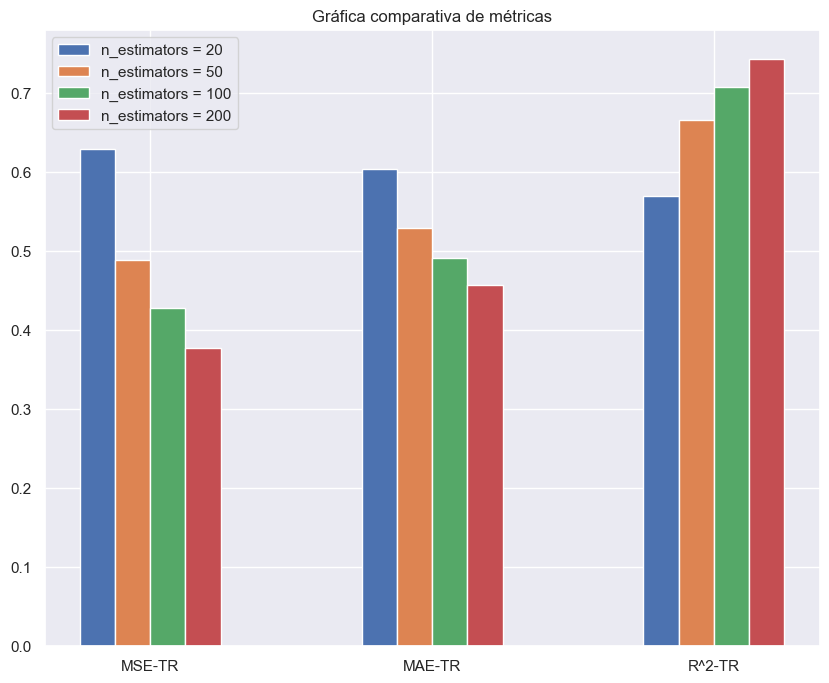

In [37]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 20, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 200, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100', 'n_estimators = 200']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De momento 100 árboles está bien, el tiempo de cómputo es competente y los resultados buenos, no aumentamos más debido a que ya no hay tanta mejora en validación, si conseguimos mejorar la generalización del modelo más adelante puede que aumente el número de árboles.

**learning_rate**

Un valor más bajo de tasa de aprendizaje reduce el impacto de cada árbol, lo que puede ayudar a prevenir el sobreajuste y a mejorar la generalización.

Probamos un conjunto de valores alrededor de 0.1 que es el valor predeterminado.

╒═════════════════════╤════════════════════════╤════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│ Métricas de error   │   learning_rate = 0.04 │   learning_rate = 0.08 │   learning_rate = 0.1 │   learning_rate = 0.4 │   learning_rate = 0.8 │
╞═════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╡
│ MSE                 │               0.558889 │               0.509813 │              0.503015 │              0.510016 │              0.598609 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ MAE                 │               0.568383 │               0.542373 │              0.537818 │              0.544475 │              0.594769 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───

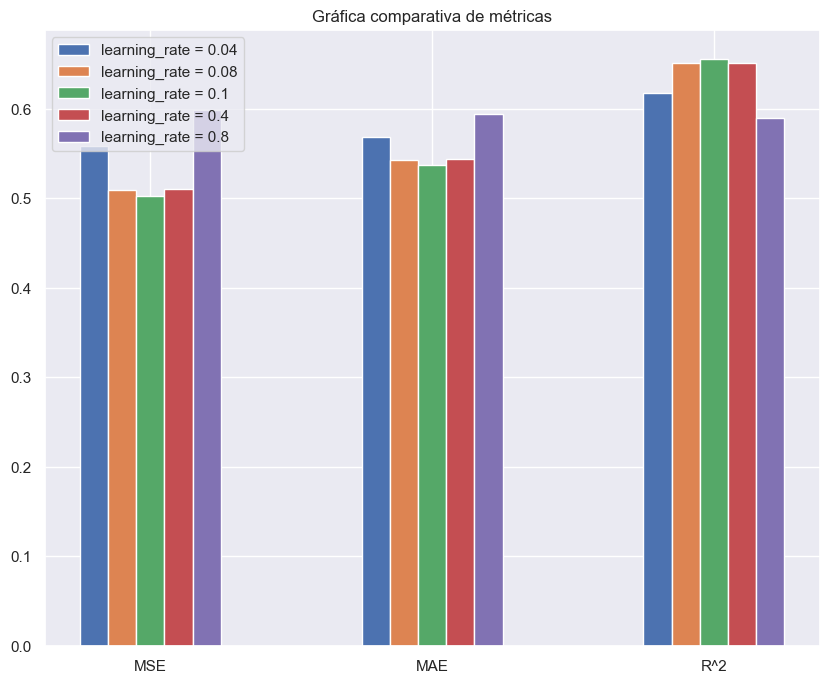

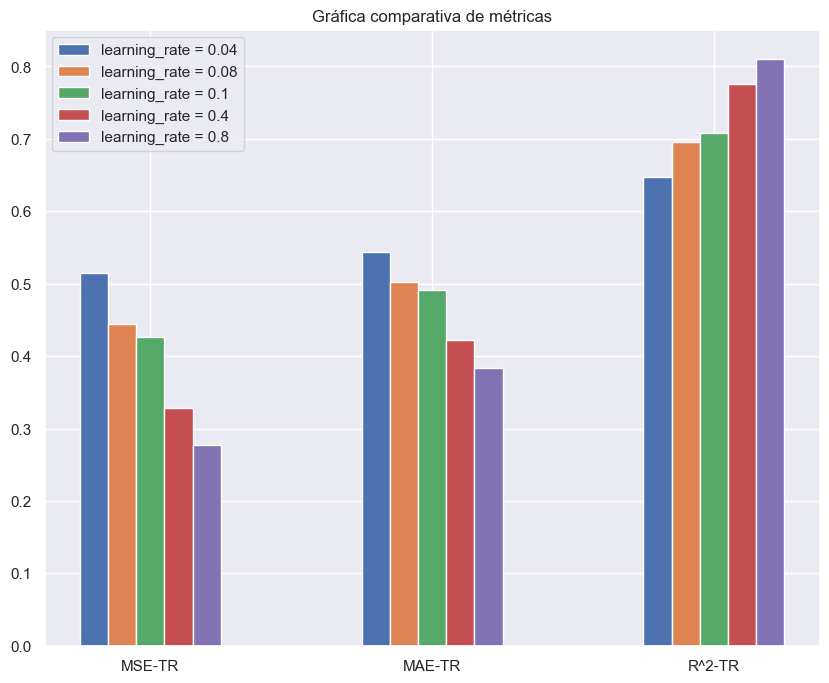

In [38]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.04, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.08, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.4, random_state=34)
model_5 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.8, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['learning_rate = 0.04', 'learning_rate = 0.08', 'learning_rate = 0.1', 'learning_rate = 0.4', 'learning_rate = 0.8']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Un learning_rate de 0.1 es el que mejores resultados ofrece, por lo que mantengo dicho valor.

**subsample**

Un valor menor de subsample significa una reducción de la varianza y aumento del sesgo en el proceso de entrenamiento, ya que cada árbol se entrena en un subconjunto aleatorio de las muestras. Esto puede ayudar a reducir el riesgo de sobreajuste.

Probaré con distintos porcentajes de subsample.

╒═════════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Métricas de error   │   subsample=1.0 │   subsample=0.8 │   subsample=0.6 │   subsample=0.4 │
╞═════════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ MSE                 │        0.503015 │        0.498822 │        0.497817 │        0.496948 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MAE                 │        0.537818 │        0.536682 │        0.535783 │        0.536802 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ R^2                 │        0.65559  │        0.65845  │        0.65916  │        0.65976  │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MSE-TR              │        0.42689  │        0.426618 │        0.4272   │        0.428424 │
├─────────────────────┼─────────────────

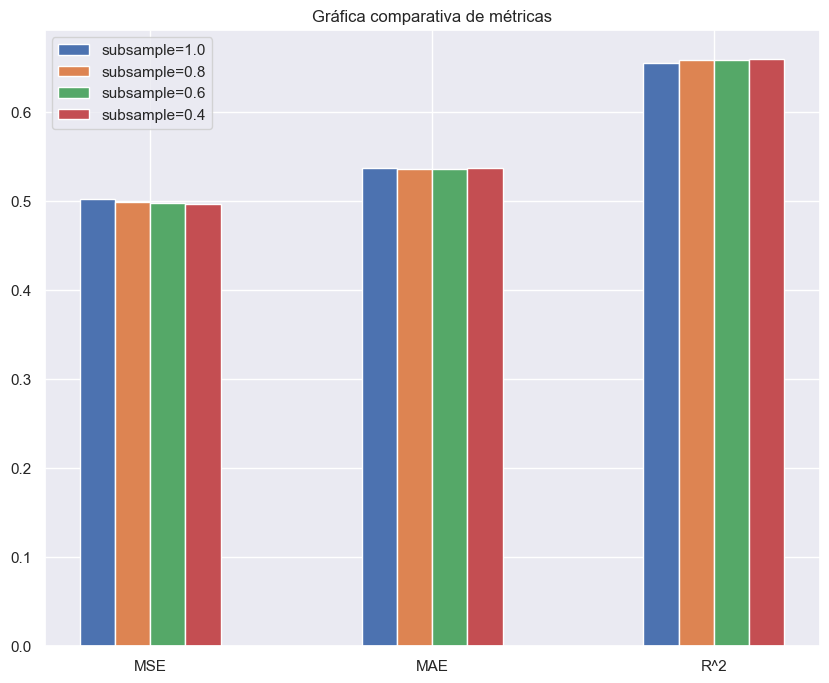

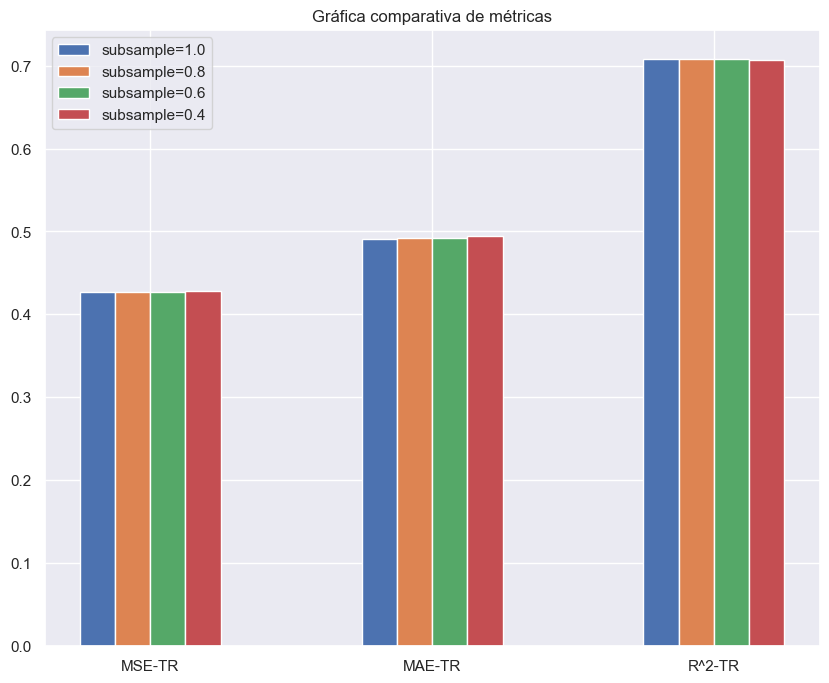

In [39]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=1.0, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['subsample=1.0', 'subsample=0.8', 'subsample=0.6', 'subsample=0.4']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Con todas las opciones los resultados son muy similares, elijo un subconjunto del 60%, ya que así los tiempos de cómputo serán menores y tampoco nos quedamos con pocos datos como sería el caso de seleccionar el 40%.

**max_depth**

A mayor profundidad creamos árboles más complejos, pero puede existir sobreajuste si no se controla. Probaré varios valores teniendo en cuenta que hasta ahora el valor por defecto ha sido 3.

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max_depth=2 │   max_depth=3 │   max_depth=4 │   max_depth=6 │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ MSE                 │      0.521911 │      0.496948 │      0.490474 │      0.492002 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE                 │      0.551496 │      0.536802 │      0.530578 │      0.533136 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ R^2                 │      0.642646 │      0.65976  │      0.664151 │      0.663056 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MSE-TR              │      0.487295 │      0.428424 │      0.367505 │      0.225238 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE-TR              │      0.5

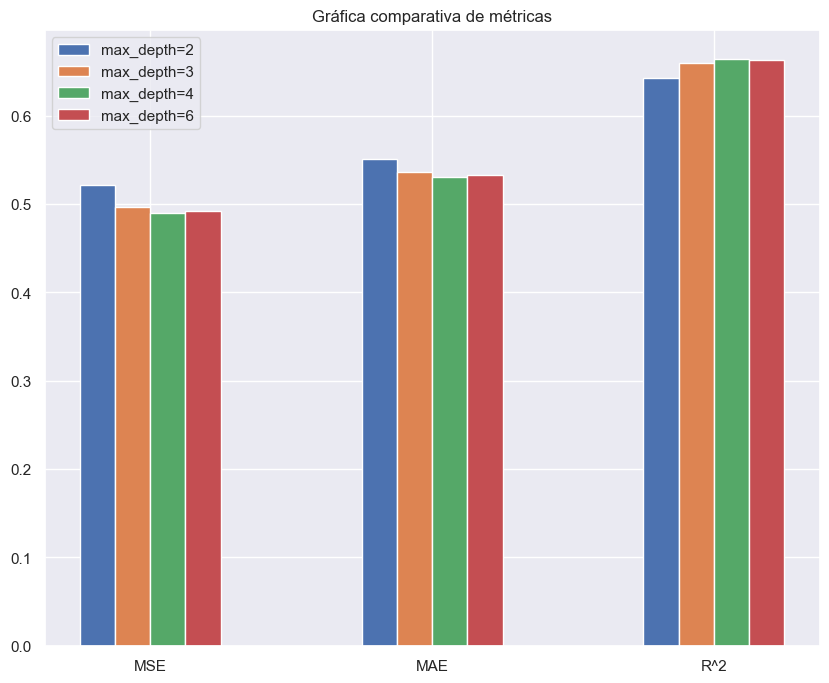

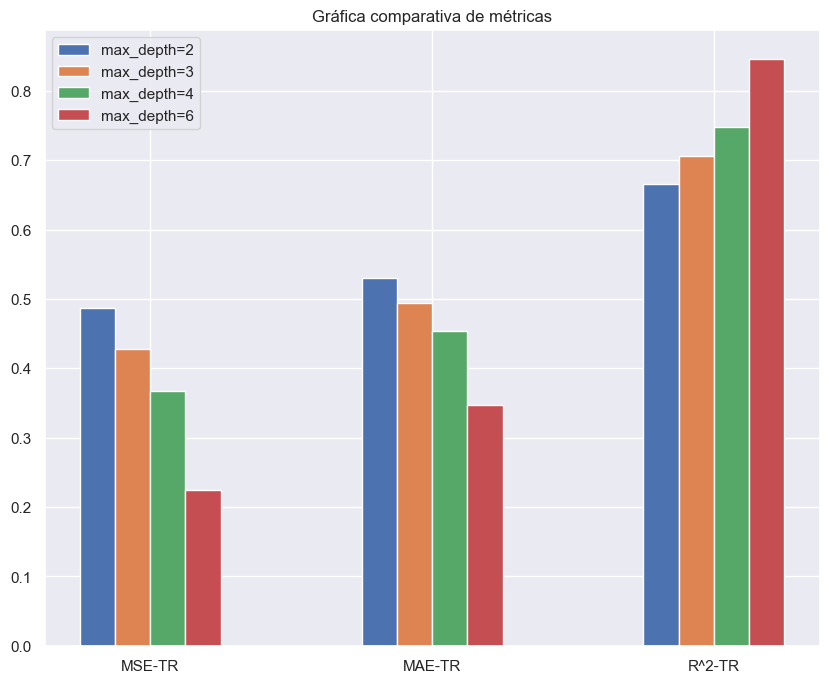

In [59]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, max_depth=2, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, max_depth=3, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, max_depth=4, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, max_depth=6, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Una profundidad de 6 es la que mejores resultados da. Entiendo que no podemos reducir más el sobreajuste mediante tuneo de parámetros, si reducimos la complejidad el modelo no generalizará mejor, sino que simplemente no podrá adaptarse a la complejidad de la relación de los datos del problema.

**max_features**

Al reducir el máximo de características hacemos que se reduzca la variabilidad y aumente el sesgo, aunque con otros parámetros que ya hemos modificado esto no ha ayudado probaré varios valores para ver si sirve de algo.

╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=None │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │            0.48223  │            0.497413 │            0.505565 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │            0.526247 │            0.536607 │            0.540392 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │            0.669793 │            0.659387 │            0.653905 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MSE-TR              │            0.209011 │            0.262855 │            0.268254 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE-TR  

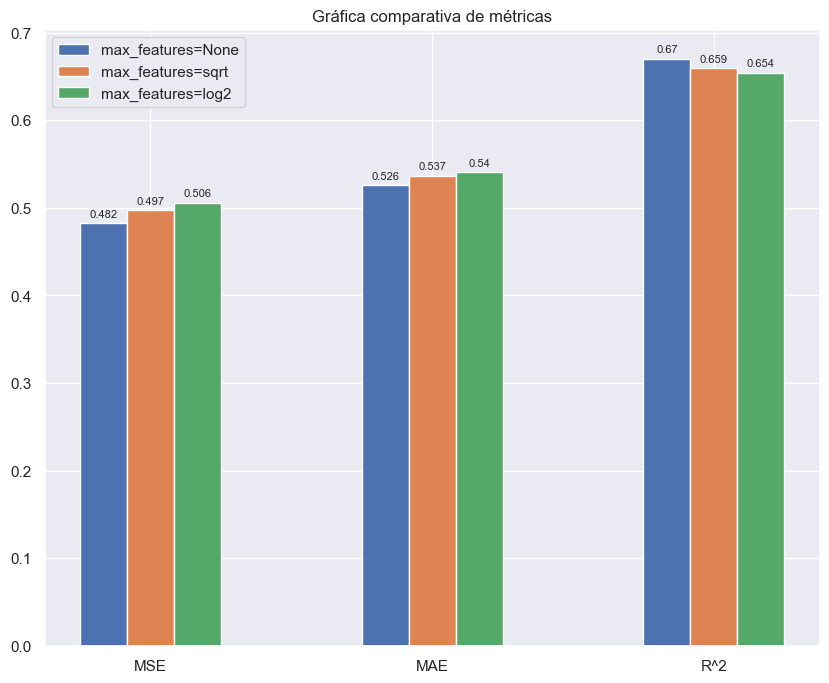

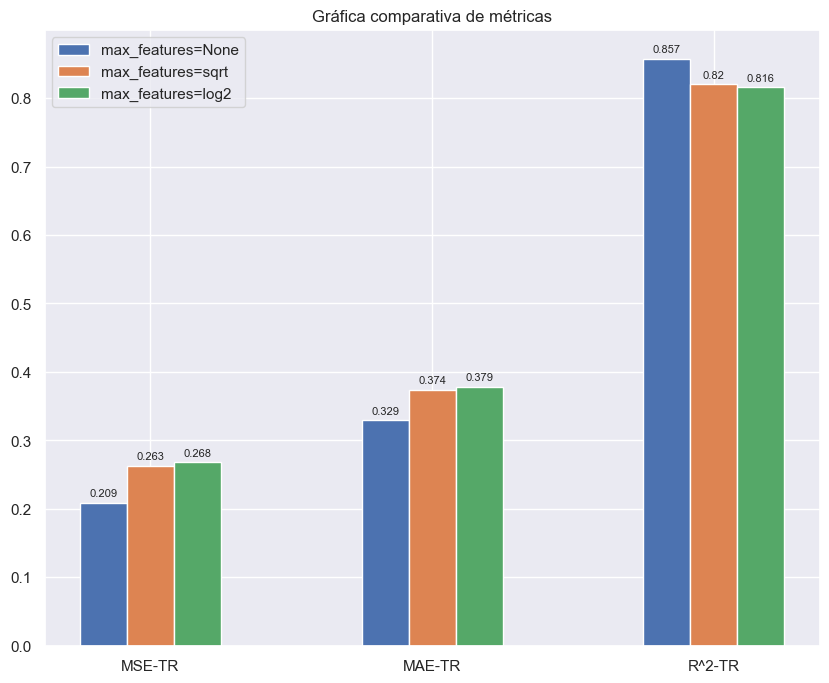

In [43]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, max_features=None, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, max_features='sqrt', random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, max_features='log2', random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_features=None', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De nuevo el intentar reducir la complejidad no sirve de nada, apesar de que reduciendo características se generaliza mejor, esto no es por una mejora en los resultados de validación, sino por una peora en los de train, dejo pues el parámetro que había por defecto.

### Gradient Boosting entrenamiento progresivo

Utilizamos progresivamente más datos, es decir, vamos incrementando el
número de ejemplos de entrenamiento para ver si el sobreajuste va disminuyendo, eso nos daría una idea/intuición de que el problema viene de que tenemos pocos datos.

In [44]:
# Utiliza train_test_split para separar el 15% de las filas para el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(x_train_pca, y_train_log, test_size=0.15, random_state=0)

# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

tree_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, max_features=None, random_state=34)

for i in range(99):
  # Usamos de nuevo la función train_test_split, pero en vez de dividirme en train y test me irá dividiendo "test" cada vez en mayor tamaño que usaré como mini conjunto de train
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(X_train, y_train, test_size=(i+1)*0.01, random_state=0)

  tree_1.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = tree_1.predict(X_subtrain)
  pred_y_val = tree_1.predict(X_val)

  # Calculo los errores
  Ein = r2_score(y_subtrain, pred_y_subtrain)
  Eout = r2_score(y_val, pred_y_val)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
tree_1.fit(X_train, y_train)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = tree_1.predict(X_train)
pred_y_val = tree_1.predict(X_val)

# Calculo los errores
Ein = r2_score(y_train, pred_y_train)
Eout = r2_score(y_val, pred_y_val)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

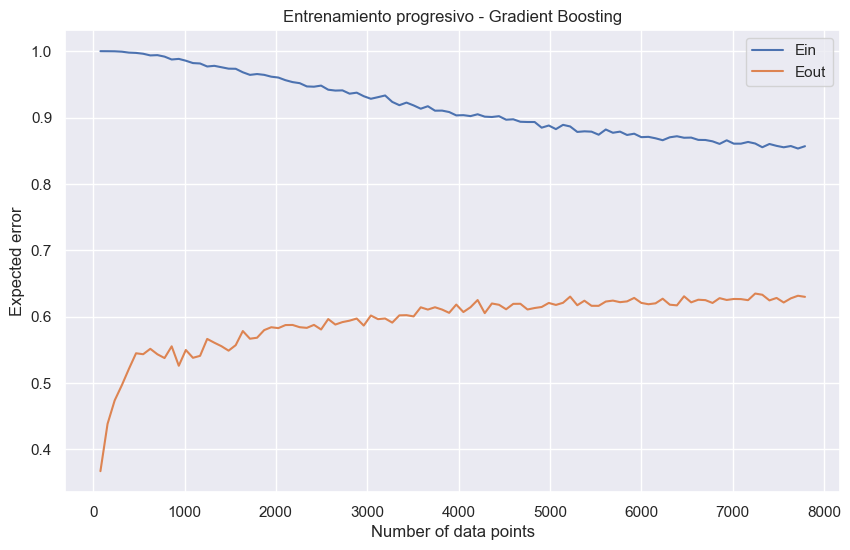

In [48]:
# Agregar etiquetas y leyenda
plt.figure(figsize=(10,6))
plt.title('Entrenamiento progresivo - Gradient Boosting')
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.grid(True)

# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')
plt.legend()

# Mostrar la gráfica
plt.show()

### MultiLayer Perceptron (MLP)

Como RF está afectado por un problema de overfitting que probablemente sea debido a la reducida cantidad de datos con la que contamos vamos a probar otro modelo para ver si este también es afectado por lo mismo o por el contrario obtenemos mejores resultados.



El modelo elegido es un Perceptron Multicapa (MLP), el cual también es un modelo complejo y puede dar buenos resultados, sus parámetros principales son:

* hidden_layer_sizes: Este parámetro acepta una tupla que especifica la estructura de capas ocultas de la red. Los elementos de la tupla representan el número de neuronas en cada capa oculta, y la longitud de la tupla determina la cantidad de capas ocultas en la red.

* activation: Su función es determinar la función de activación utilizada en las neuronas de la red. La función de activación es una parte esencial de una red neuronal y se aplica a la salida de cada neurona en una capa para determinar su salida final.

* solver: Sirve para especificar el algoritmo de optimización que se utilizará durante el entrenamiento de la red neuronal. El algoritmo de optimización es responsable de ajustar los pesos de la red para minimizar la función de pérdida.

* alpha: Controla el término de regularización L2 (también conocido como regularización de peso o regularización Ridge).

* batch_size: Se refiere al número de ejemplos de entrenamiento que se utilizan en cada paso de actualización de los pesos del modelo durante el entrenamiento. En otras palabras, es la cantidad de datos que se procesan en cada iteración durante el proceso de entrenamiento.

* learning_rate: Política de actualización para learning rate, como no tengo pensado usar el solver 'sgd', este parámetro no influye.

* learning_rate_init: Valor inicial del learning rate.

* early_stopping: Controla si se debe utilizar la técnica de parada anticipada (early stopping) durante el entrenamiento de la red neuronal. La parada anticipada es una técnica que se utiliza para evitar el sobreajuste del modelo al detener el entrenamiento tan pronto como se observa un deterioro en el rendimiento del modelo en un conjunto de datos de validación.

**hidden_layer_sizes**

Agregar más neuronas o capas ocultas puede permitir que la red aprenda representaciones más complejas de los datos, pero también puede aumentar el riesgo de sobreajuste.

Buscaré información en internet acerca de cual es el número adecuado de capas a añadir.

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

Normalmente con una capa oculta suele bastar y en cuanto al número de nodos este suele ser la media entre la capa de entrada y la de salida, en este caso 28. Probaré esta estructura junto con otras estructuras modificadas de esta y compararé los resultados.

╒═════════════════════╤═══════════════════════════╤═══════════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│ Métricas de error   │   hidden_layer_sizes=(28) │   hidden_layer_sizes=(28, 28) │   hidden_layer_sizes=(56) │   hidden_layer_sizes=(56, 56) │
╞═════════════════════╪═══════════════════════════╪═══════════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ MSE                 │                  0.551756 │                      0.569246 │                  0.624604 │                      0.789909 │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ MAE                 │                  0.573214 │                      0.580504 │                  0.60877  │                      0.68592  │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼─────────────────────────

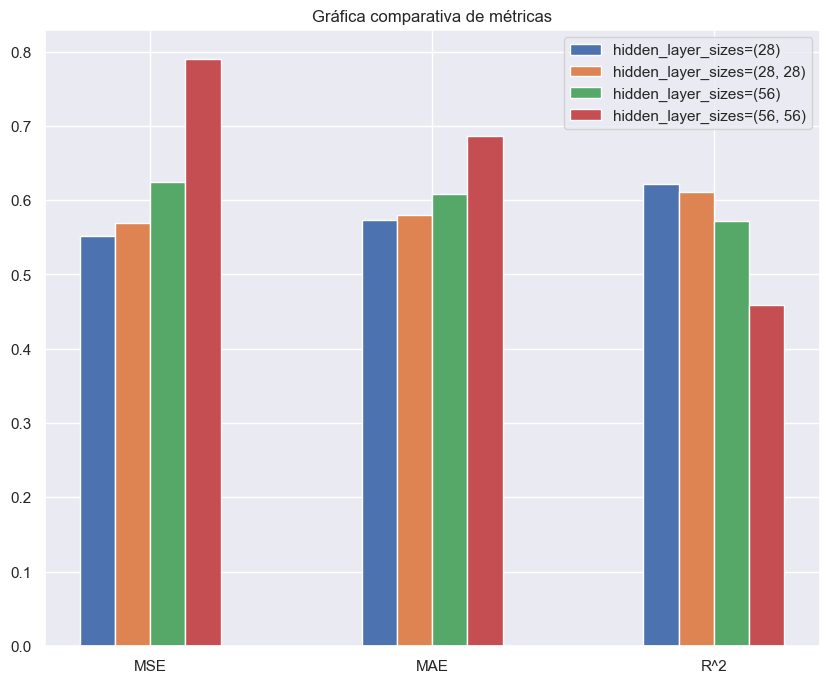

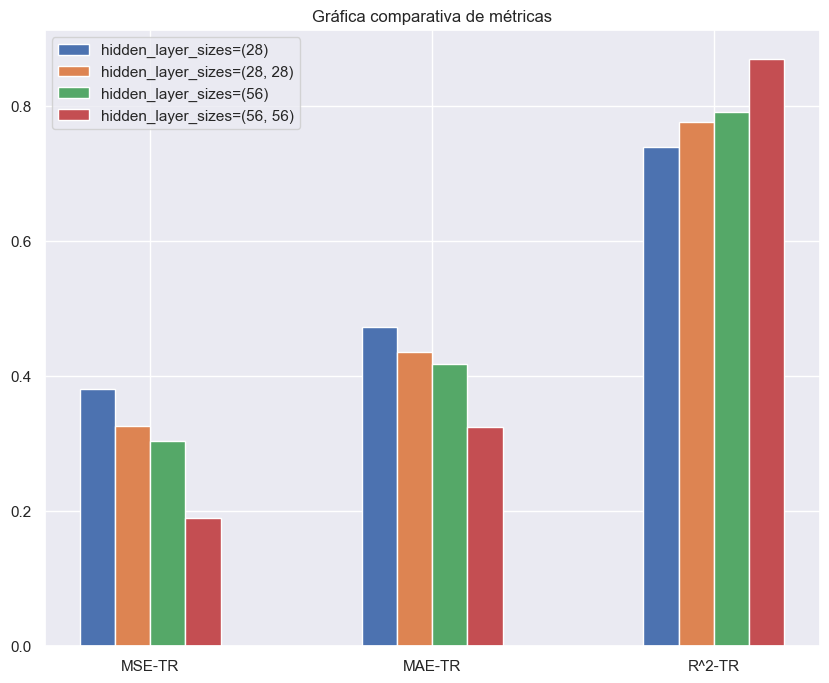

In [49]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=500)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28, 28), max_iter=500)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(56), max_iter=500)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(56, 56), max_iter=500)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['hidden_layer_sizes=(28)', 'hidden_layer_sizes=(28, 28)', 'hidden_layer_sizes=(56)', 'hidden_layer_sizes=(56, 56)']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que a más capas más sobreajuste como ya comentabamos y también a más nodos por capa más sobreajuste. También podemos ver que en general es mejor aumentar el número de capas que el número de nodos por capa.

**activation**

Porbaremos dos funciones de activación:

* 'relu' (Rectified Linear Unit): Esta es una de las funciones de activación más populares. Es una función no lineal que devuelve el valor de entrada si es positivo y 0 si es negativo. Es la que viene por defecto.

* 'tanh': Utiliza la función tangente hiperbólica como función de activación. La función tangente hiperbólica comprime la salida de las neuronas en el rango (-1, 1) y se utiliza comúnmente en problemas de regresión y clasificación.

╒═════════════════════╤═══════════════════╤═══════════════════╕
│ Métricas de error   │   activation=relu │   activation=tanh │
╞═════════════════════╪═══════════════════╪═══════════════════╡
│ MSE                 │          0.551756 │          0.505053 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE                 │          0.573214 │          0.546565 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2                 │          0.62218  │          0.653999 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MSE-TR              │          0.380457 │          0.373207 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE-TR              │          0.472447 │          0.465696 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2-TR              │          0.739458 │          0.7444   │
╘═════════════════════╧═══════════════════╧═══════════════════╛


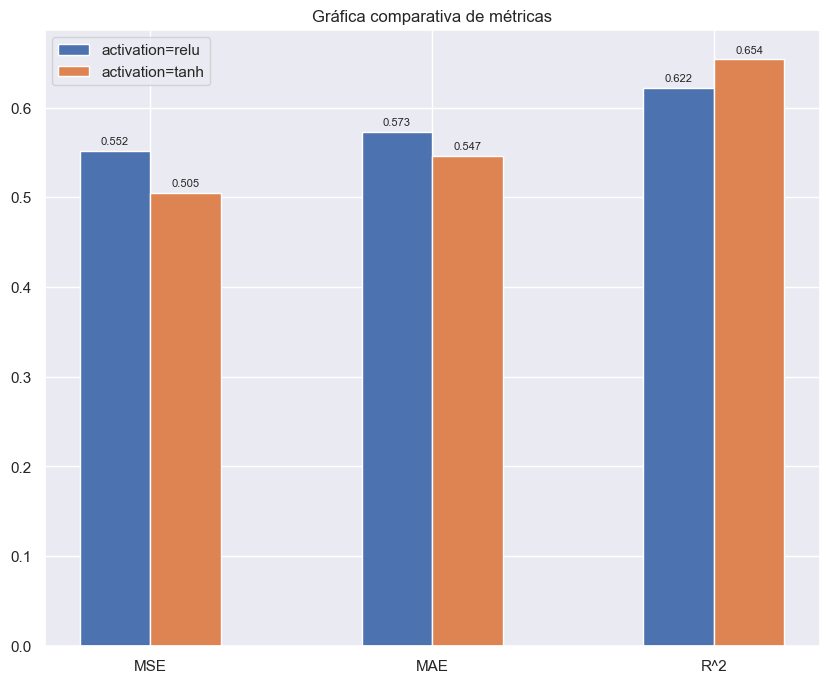

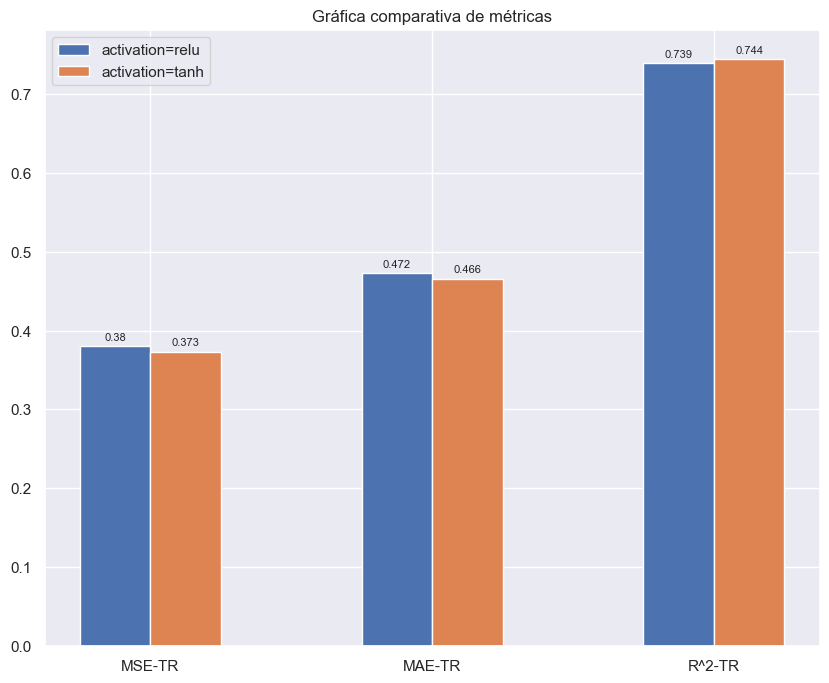

In [50]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=500, activation='relu')
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['activation=relu', 'activation=tanh']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Con la tangente hiperbólica vemos que el sobreajuste se reduce bastante en comparación con 'relu', tal vez porque esta última sea demasiado compleja para nuestro problema, selecciono entonces la tangente hiperbólica.

**solver**

Compararemos el solver 'adam' con el 'lbfgs', adam es el más comúnmente utilizado, usa el método de SGD, aunque automáticamente optimiza el valor del learning rate, por lo que es menos sensible que 'sgd' a la elección manual del mismo. En cuanto a lbfgs este es un algoritmo de optimización de segundo orden que utiliza el método de Broyden-Fletcher-Goldfarb-Shanno (BFGS). Puede ser más lento en comparación con 'adam' y 'sgd', pero puede ser útil para conjuntos de datos más pequeños.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

╒═════════════════════╤═══════════════╤════════════════╕
│ Métricas de error   │   solver=adam │   solver=lbfgs │
╞═════════════════════╪═══════════════╪════════════════╡
│ MSE                 │      0.505053 │       0.708044 │
├─────────────────────┼───────────────┼────────────────┤
│ MAE                 │      0.546565 │       0.64124  │
├─────────────────────┼───────────────┼────────────────┤
│ R^2                 │      0.653999 │       0.515123 │
├─────────────────────┼───────────────┼────────────────┤
│ MSE-TR              │      0.373207 │       0.26874  │
├─────────────────────┼───────────────┼────────────────┤
│ MAE-TR              │      0.465696 │       0.395473 │
├─────────────────────┼───────────────┼────────────────┤
│ R^2-TR              │      0.7444   │       0.815965 │
╘═════════════════════╧═══════════════╧════════════════╛


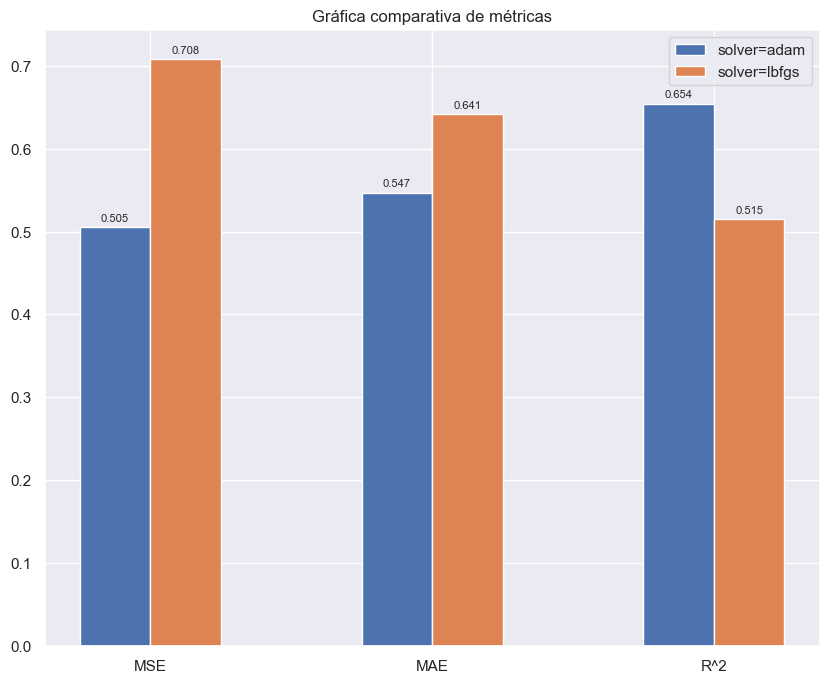

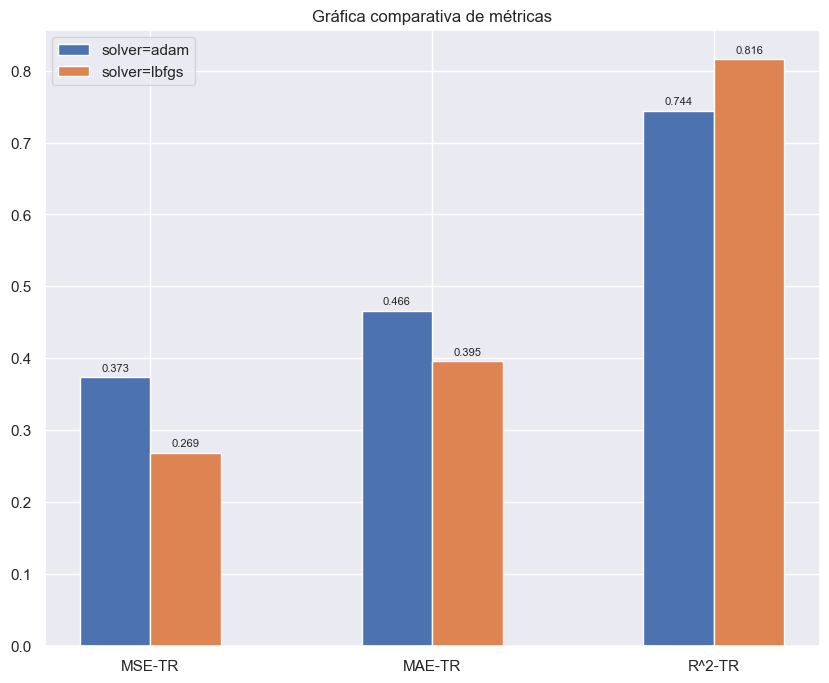

In [51]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam')
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='lbfgs')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['solver=adam', 'solver=lbfgs']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que con el solver lbfgs el sobreajuste es enorme, por lo que nos quedamos con adam.

**alpha**

Debido a los problemas de sobreajuste, la idea es aplicar una fuerte regularización al modelo, por lo que los valores a probar serán el valor por defecto (0.0001) y valores de magnitudes mayores.

╒═════════════════════╤════════════════╤═══════════════╤══════════════╤═════════════╤═══════════╕
│ Métricas de error   │   alpha=0.0001 │   alpha=0.001 │   alpha=0.01 │   alpha=0.1 │   alpha=1 │
╞═════════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╪═══════════╡
│ MSE                 │       0.505053 │      0.504975 │     0.505591 │    0.492483 │  0.464008 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MAE                 │       0.546565 │      0.546505 │     0.547487 │    0.539395 │  0.520556 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ R^2                 │       0.653999 │      0.654054 │     0.653661 │    0.662742 │  0.682345 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MSE-TR              │       0.373207 │      0.373274 │     0.370957 │    0.379519 │  0.415535 │
├───────────────────

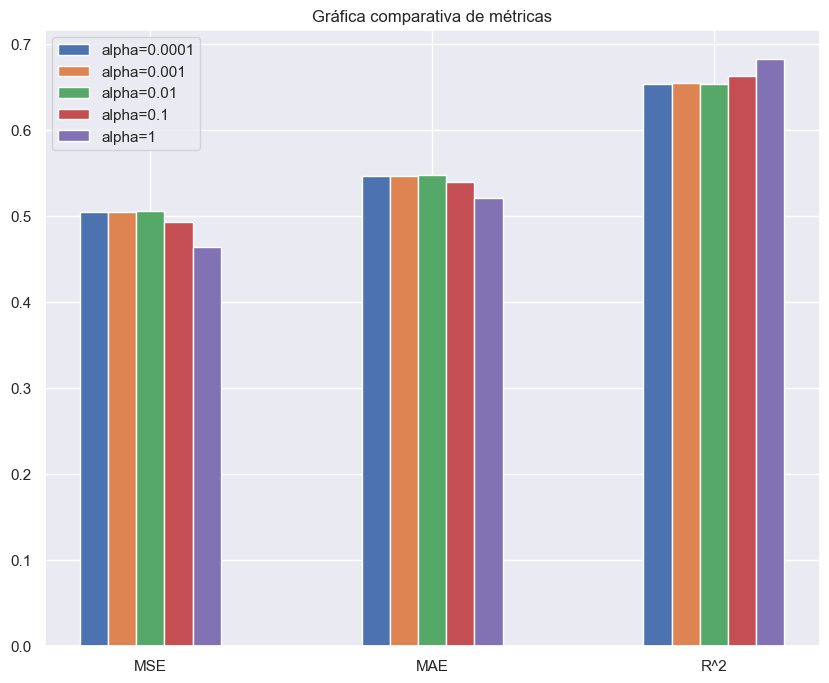

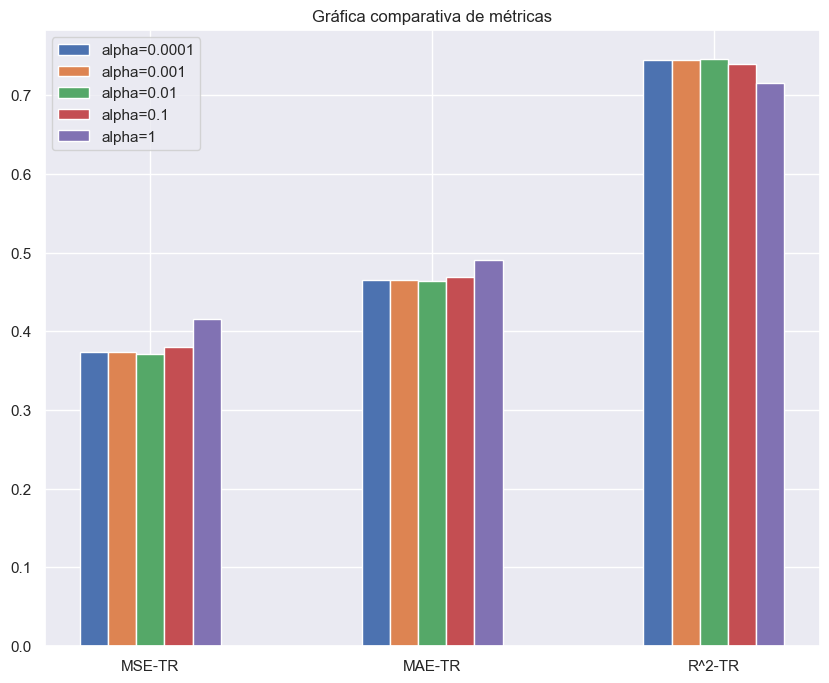

In [52]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.0001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.001)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.01)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.1)
model_5 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4, result5))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['alpha=0.0001', 'alpha=0.001', 'alpha=0.01', 'alpha=0.1', 'alpha=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que regularizar fuertemente funciona, de hecho voy a probar a seguir aumentando alpha para ver como se comporta el modelo.

╒═════════════════════╤═══════════╤═════════════╤═══════════╕
│ Métricas de error   │   alpha=1 │   alpha=2.5 │   alpha=5 │
╞═════════════════════╪═══════════╪═════════════╪═══════════╡
│ MSE                 │  0.464008 │    0.464218 │  0.480443 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MAE                 │  0.520556 │    0.518831 │  0.529894 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ R^2                 │  0.682345 │    0.682144 │  0.671033 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MSE-TR              │  0.415535 │    0.44023  │  0.469244 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MAE-TR              │  0.4906   │    0.505116 │  0.524061 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ R^2-TR              │  0.715424 │    0.698523 │  0.678652 │
╘═════════════════════╧═══════════╧═════════════╧═══════════╛


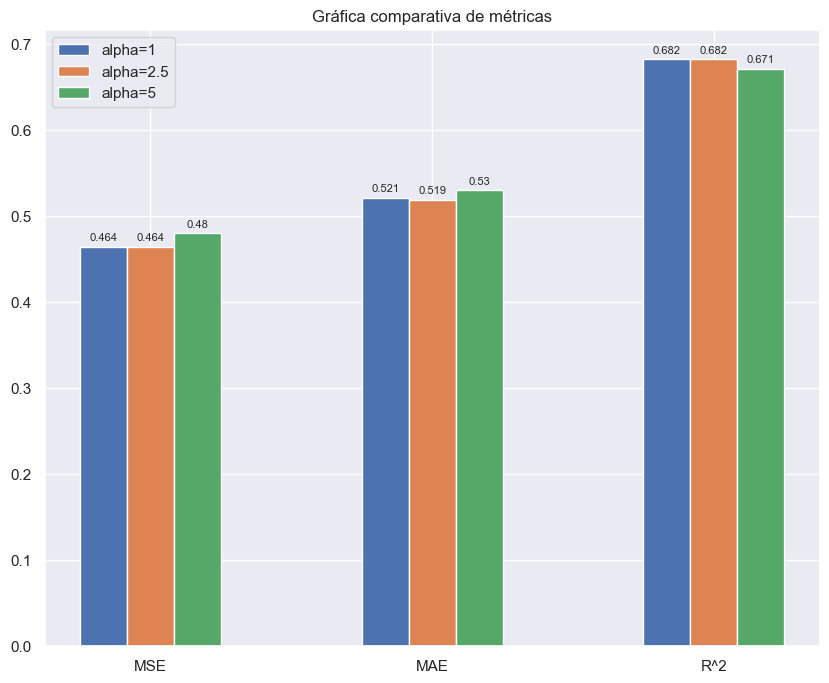

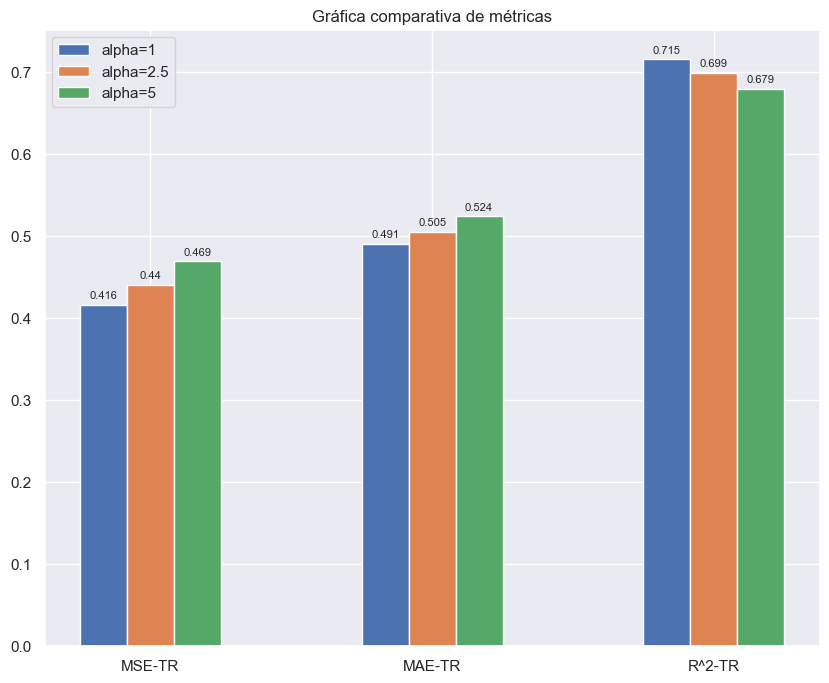

In [53]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=2.5)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=5)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['alpha=1', 'alpha=2.5', 'alpha=5']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que con alpha=1 es suficiente, cuando seguimos aumentando la regularización ya empeoramos demasiado el modelo en train, por lo que al final en validación los resultados también van a ser peores aunque generalice mejor.

**learning_rate_init**

Siendo el valor por defecto 0.001, probaré valores de magnitudes superiores a dicho valor, si no pruebo magnitudes inferiores es porque viendo los warning de que 1000 iteraciones no son suficientes para converger, un learning rate menor implicará más iteraciones aún y por tanto probablemente solo empeore los resultados.

╒═════════════════════╤════════════╤═══════════╤══════════╤══════════╕
│ Métricas de error   │   lr=0.001 │   lr=0.01 │   lr=0.1 │     lr=1 │
╞═════════════════════╪════════════╪═══════════╪══════════╪══════════╡
│ MSE                 │   0.464008 │  0.477144 │ 0.561628 │ 0.917089 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MAE                 │   0.520556 │  0.529616 │ 0.582367 │ 0.760541 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ R^2                 │   0.682345 │  0.673317 │ 0.615399 │ 0.372813 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MSE-TR              │   0.415535 │  0.435552 │ 0.540407 │ 0.915682 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MAE-TR              │   0.4906   │  0.504024 │ 0.571287 │ 0.761073 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ R^2-TR              │   0.715424 │  0.701729 │ 0.629908 │ 0.372669 │
╘═════

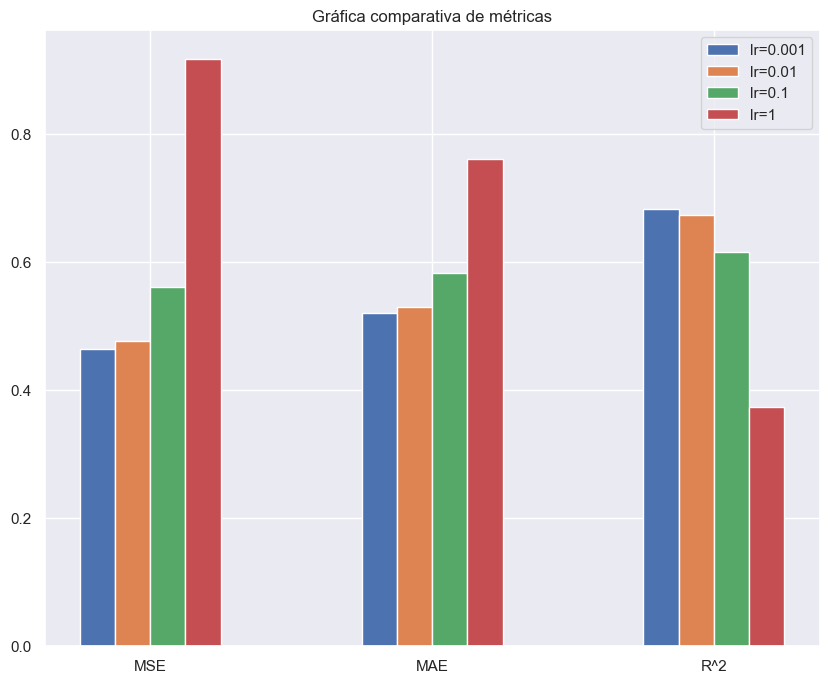

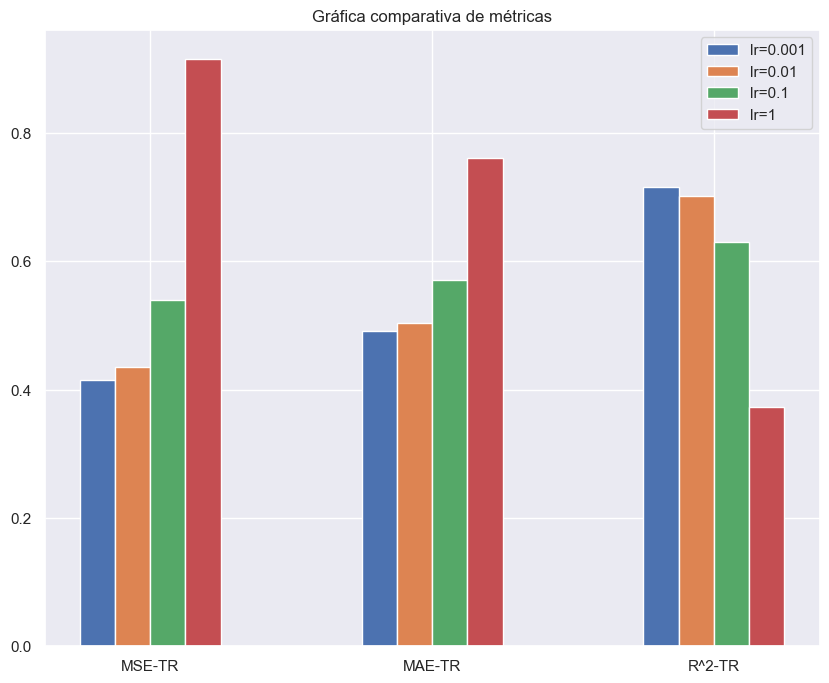

In [54]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.01)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.1)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['lr=0.001', 'lr=0.01', 'lr=0.1', 'lr=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que un lr=0.001 da los mejores resultados, por lo que dejamos ese.

### MLP BayesianSearch

Tras observar los resultados finales de MLP creo que tiene aún margen de mejora ahora que hemos solucionado el problema del sobreajuste, por lo que volveré a hacer el tuneo de hiperparámetros, pero esta vez usaré la búsqueda bayesiana, para así obtener resultados más exactos, uso este tipo de búsqueda respecto a GridSearch o RandomSearch ya que en general es más rápido y los resultados suelen ser mejores.

Explicación de como funciona el método: https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

Los principales parámetros de BayesSearchCV son:
* estimator: Es el modelo a usar, al que se le va a realizar el tuneo de parámetros.

* search_spaces: Es el conjunto de parámetros que queremos optimizar con la búsqueda bayesiana.

* n_iter: Se refiere al número de iteraciones que el proceso de búsqueda bayesiana realizará para buscar las mejores combinaciones de hiperparámetros. En otras palabras, n_iter controla cuántas veces se evaluarán diferentes configuraciones de hiperparámetros durante la búsqueda.

* scoring: Permite especificar una métrica de evaluación que se utilizará para evaluar el rendimiento del modelo durante la búsqueda de hiperparámetros. En nuestro caso usaremos el coeficiente de determinación 'r2', ya que en todo el proceso manual de selección de parámetros es la que más he tenido en cuenta.

* n_points: Especifica el número de puntos aleatorios que se muestrean en el espacio de búsqueda antes de que comience la optimización bayesiana real. Estos puntos aleatorios se utilizan para explorar inicialmente el espacio de búsqueda y proporcionar puntos iniciales a partir de los cuales se inicia la búsqueda bayesiana. Lo dejaré en 1 como estaba de forma predeterminada, ya que aumentar su valor puede aumentar el tiempo de cálculo, ya que se están evaluando múltiples puntos iniciales.

* cv: Determina la estrategia para Cross-Validation, en nuestro caso usaremos 5 folds como venimos usando en todo el problema.

* refit: Una vez se tiene el modelo con los mejores hiperparámetros, este se vuelve a entrenar con todo el conjunto. Lo desactivaré, ya que en esta parte solo quiero obtener los mejores hiperparámetros, no tener ya el modelo entrenado.

* return_train_score: Si se especifica a True, en los resultados de CV se incluirán los rendimientos en train. Lo activo para comprobar si existe sobreajuste.

In [38]:
from skopt import BayesSearchCV

# Definimos el espacio de búsqueda de hiperparámetros
search_space = {
    'hidden_layer_sizes': (5, 100),  # Número de neuronas en la capa oculta
    'alpha': (0.001, 10),  # Rango de valores para el parámetro de regularización alpha
    'activation': ['logistic', 'tanh', 'relu'],  # Función de activación
    'solver': ['lbfgs', 'adam'],  # Algoritmo de optimización
    'learning_rate_init': (0.0001, 1.5), # Learning rate inicial
    'batch_size': (1, 8)
}

# Creamos un estimador (en este caso un MLP)
estimator = MLPRegressor(max_iter=750, random_state=0, early_stopping=True)

# Inicializamos BayesSearchCV con el estimador, el espacio de búsqueda y la estrategia de validación cruzada
opt = BayesSearchCV(estimator, search_space, n_iter=100, scoring="r2", cv=5, n_jobs=-1, random_state=42, refit=False, return_train_score=True, verbose=1)

# Realizamos la búsqueda de hiperparámetros
opt.fit(x_train_pca, y_train_log)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5,
              estimator=MLPRegressor(early_stopping=True, max_iter=750,
                                     random_state=0),
              n_iter=100, n_jobs=-1, random_state=42, refit=False,
              return_train_score=True, scoring='r2',
              search_spaces={'activation': ['logistic', 'tanh', 'relu'],
                             'alpha': (0.001, 10), 'batch_size': (1, 8),
                             'hidden_layer_sizes': (5, 100),
                             'learning_rate_init': (0.0001, 1.5),
                             'solver': ['lbfgs', 'adam']},
              verbose=1)

In [39]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", opt.best_params_)
print("Resultado (R^2):", opt.best_score_)

Mejores hiperparámetros: OrderedDict([('activation', 'logistic'), ('alpha', 10.0), ('batch_size', 1), ('hidden_layer_sizes', 7), ('learning_rate_init', 0.0001), ('solver', 'lbfgs')])
Resultado (R^2): 0.6416847512345274


Pues al final el resultado no es mejor tras todo este tuneo de parámetros, el valor de R^2 es prácticamente igual que en el anterior modelo con el tuneo de los parámetros manual. Tal vez si aumento el número de capas, así como de nodos tal vez consiga una mejora.

**hidden_layer_size**

╒═════════════════════╤══════════════════════════╤═════════════════════════════╤═══════════════════════════╤══════════════════════════════╕
│ Métricas de error   │   hidden_layer_sizes=(7) │   hidden_layer_sizes=(7, 7) │   hidden_layer_sizes=(14) │   hidden_layer_sizes=(14, 7) │
╞═════════════════════╪══════════════════════════╪═════════════════════════════╪═══════════════════════════╪══════════════════════════════╡
│ MSE                 │                 0.523423 │                    0.525471 │                  0.527963 │                     0.527209 │
├─────────────────────┼──────────────────────────┼─────────────────────────────┼───────────────────────────┼──────────────────────────────┤
│ MAE                 │                 0.554856 │                    0.554319 │                  0.557012 │                     0.557002 │
├─────────────────────┼──────────────────────────┼─────────────────────────────┼───────────────────────────┼──────────────────────────────┤
│ R^2               

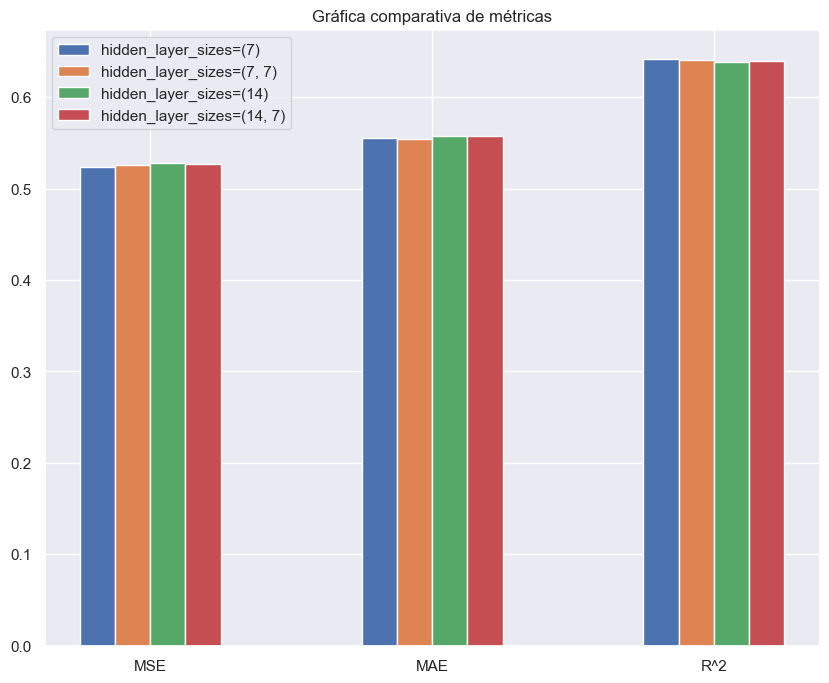

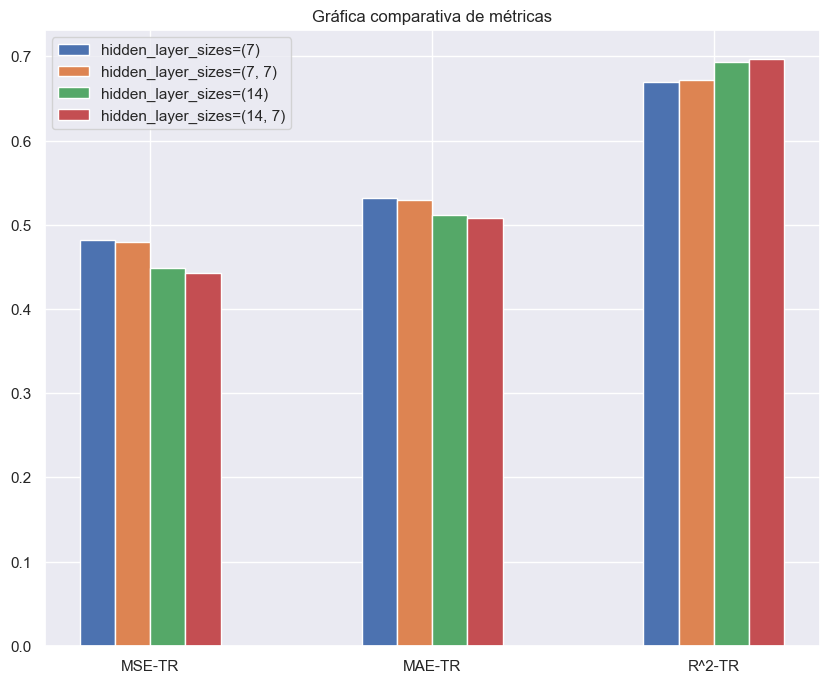

In [40]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_2 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_3 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(14), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_4 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(14, 7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['hidden_layer_sizes=(7)', 'hidden_layer_sizes=(7, 7)', 'hidden_layer_sizes=(14)', 'hidden_layer_sizes=(14, 7)']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Pues no, los mejores resultados los obtenemos usando una sola capa y 7 neuronas, esto entiendo que se debe o a que al optimizar los parámetros al final se han optimizado para una sola capa y al añadir más habría que cambiar el resto de parámetros o a que al indicar una regularización tan agresiva no influye aumentar el tamaño de la red, porque al final se impone la regularización.

**learning rate y alpha**

Con la búsquedad bayesiana varios parámetros se han quedado con el valor máximo o mínimo posible, por lo que voy a probar a darle valores más allá del límite establecido en la búsqueda bayesiana.

╒═════════════════════╤════════════╤════════════╤════════════╤══════════════════════════════╤═══════════════════════════════╕
│ Métricas de error   │   MLP-base │   alpha=12 │   alpha=15 │   learning_rate_init=0.00001 │   learning_rate_init=0.000001 │
╞═════════════════════╪════════════╪════════════╪════════════╪══════════════════════════════╪═══════════════════════════════╡
│ MSE                 │   0.523423 │   0.524312 │   0.528036 │                     0.523423 │                      0.523423 │
├─────────────────────┼────────────┼────────────┼────────────┼──────────────────────────────┼───────────────────────────────┤
│ MAE                 │   0.554856 │   0.55497  │   0.557389 │                     0.554856 │                      0.554856 │
├─────────────────────┼────────────┼────────────┼────────────┼──────────────────────────────┼───────────────────────────────┤
│ R^2                 │   0.641604 │   0.640991 │   0.638442 │                     0.641604 │                      0.6

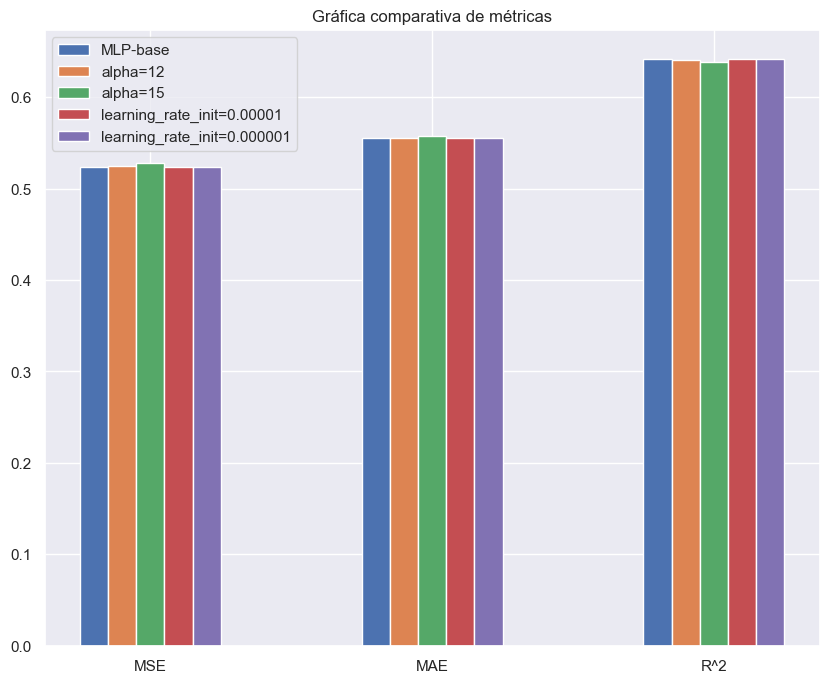

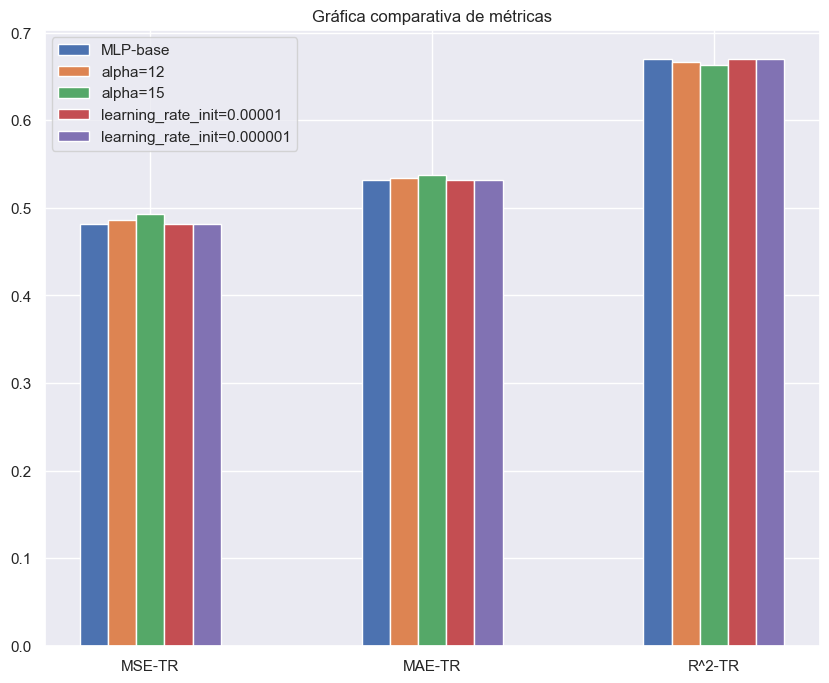

In [41]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_2 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=12, hidden_layer_sizes=(7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_3 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=15, hidden_layer_sizes=(7), learning_rate_init=0.0001, solver='lbfgs', early_stopping=True)
model_4 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(7), learning_rate_init=0.00001, solver='lbfgs', early_stopping=True)
model_5 = MLPRegressor(max_iter=750, random_state=0, batch_size=1, activation='logistic', alpha=10, hidden_layer_sizes=(7), learning_rate_init=0.000001, solver='lbfgs', early_stopping=True)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4, result5))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['MLP-base', 'alpha=12', 'alpha=15', 'learning_rate_init=0.00001', 'learning_rate_init=0.000001']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Los resultados son muy similares y lo único que consigo es mayor regularización aún, me quedaré con la opción base.

### MLP entrenamiento progresivo

Utilizamos progresivamente más datos, es decir, vamos incrementando el
número de ejemplos de entrenamiento para ver si el sobreajuste va disminuyendo, eso nos daría una idea/intuición de que el problema viene de que tenemos pocos datos.

In [55]:
# Utiliza train_test_split para separar el 15% de las filas para el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(x_train_pca, y_train_log, test_size=0.15, random_state=0)

# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

tree_1 = MLPRegressor(max_iter=750, random_state=34, activation='tanh', alpha=1, hidden_layer_sizes=(28), learning_rate_init=0.001, solver='adam')

for i in range(99):
  # Usamos de nuevo la función train_test_split, pero en vez de dividirme en train y test me irá dividiendo "test" cada vez en mayor tamaño que usaré como mini conjunto de train
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(X_train, y_train, test_size=(i+1)*0.01, random_state=0)

  tree_1.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = tree_1.predict(X_subtrain)
  pred_y_val = tree_1.predict(X_val)

  # Calculo los errores
  Ein = r2_score(y_subtrain, pred_y_subtrain)
  Eout = r2_score(y_val, pred_y_val)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
tree_1.fit(X_train, y_train)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = tree_1.predict(X_train)
pred_y_val = tree_1.predict(X_val)

# Calculo los errores
Ein = r2_score(y_train, pred_y_train)
Eout = r2_score(y_val, pred_y_val)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\34667\A

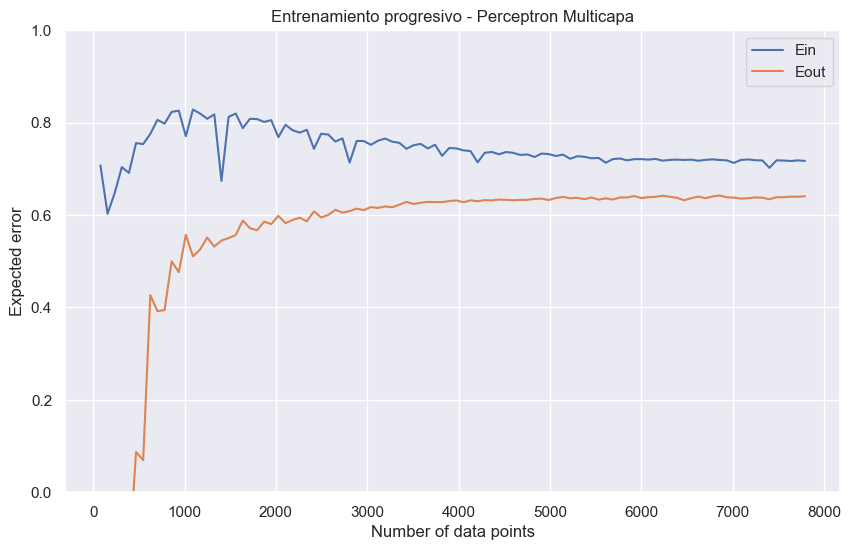

In [58]:
# Agregar etiquetas y leyenda
plt.figure(figsize=(10,6))
plt.title('Entrenamiento progresivo - Perceptron Multicapa')
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.grid(True)
plt.ylim(0, 1)

# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')
plt.legend()

# Mostrar la gráfica
plt.show()

# 6. Validación cruzada para elección del mejor modelo

Ahora que ya sabemos los mejores hiperparámetros para cada modelo, vamos a usar crossvalidation para comparar entre los tres modelos (RL, K-NN y RF) y nos quedaremos con el mejor. Aparte los compararé con un modelo dummy, para ver si los resultados son verdaderamente buenos.

Para entrenar el modelo dummy usamos su clase correspondiente de scikit-learn, un modelo dummy es un modelo muy básico que usa una estrategia simple para predecir, por ejemplo si usamos strategy='mean' el modelo siempre predecirá la media de los datos, con 'median' la mediana.

╒═════════════════════╤═════════════╤══════════╤══════════╤════════════════════╤══════════╤══════════════╕
│ Métricas de error   │        K-NN │       RL │       RF │   GradientBoosting │      MLP │   Dummy-mean │
╞═════════════════════╪═════════════╪══════════╪══════════╪════════════════════╪══════════╪══════════════╡
│ MSE                 │ 0.728952    │ 0.590786 │ 0.522701 │           0.48223  │ 0.464008 │  1.46028     │
├─────────────────────┼─────────────┼──────────┼──────────┼────────────────────┼──────────┼──────────────┤
│ MAE                 │ 0.676342    │ 0.595807 │ 0.551669 │           0.526247 │ 0.520556 │  0.953283    │
├─────────────────────┼─────────────┼──────────┼──────────┼────────────────────┼──────────┼──────────────┤
│ R^2                 │ 0.50076     │ 0.595493 │ 0.642018 │           0.669793 │ 0.682345 │ -0.000120669 │
├─────────────────────┼─────────────┼──────────┼──────────┼────────────────────┼──────────┼──────────────┤
│ MSE_tr              │ 1.43422e-14 │

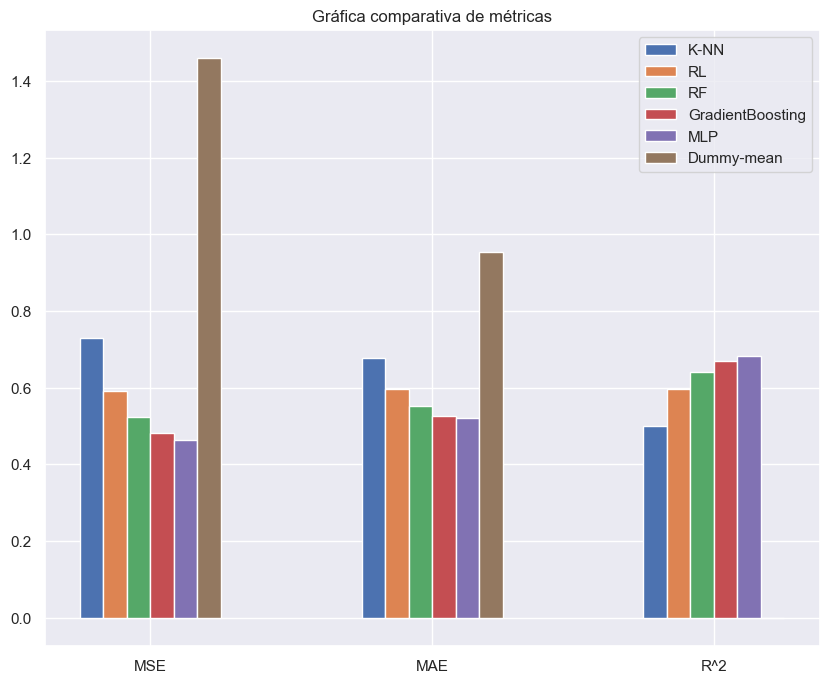

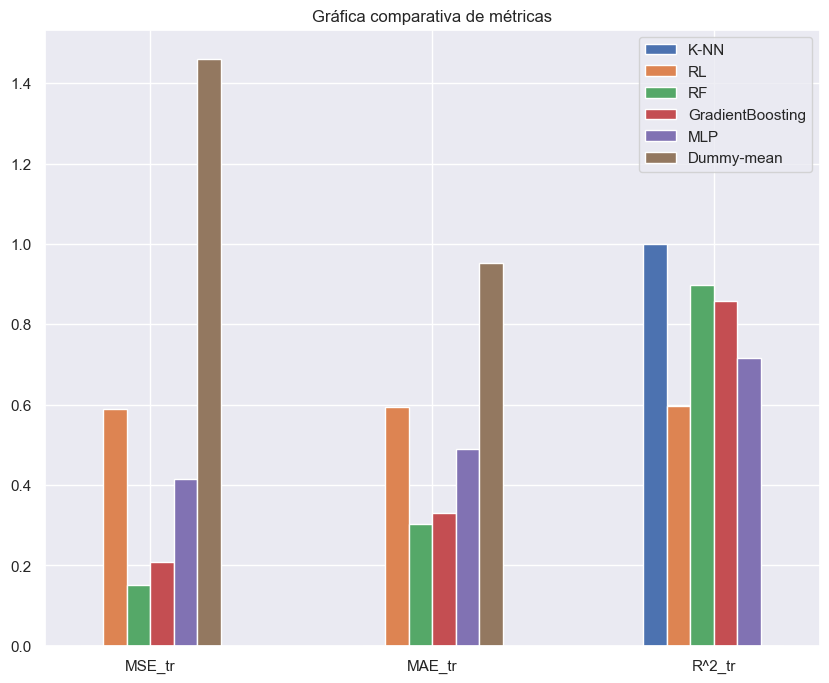

In [60]:
from sklearn.dummy import DummyRegressor

model1 = KNeighborsRegressor(n_neighbors=9, weights="distance", p=2)
model2 = SGDRegressor(penalty='l1', alpha=0.01, tol=0.001, eta0=0.01, random_state=34)
model3 = RandomForestRegressor(n_estimators = 50, max_features=1.0, max_depth=12, random_state=34, n_jobs=-1)
model4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, max_features=None, random_state=34)
model5 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.001)
model6 = DummyRegressor(strategy='mean')

result1 = crossValidation(model1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model5, kf, x_train_pca, y_train_log, True)
result6 = crossValidation(model6, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:], result6[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE_tr', 'MAE_tr', 'R^2_tr']
titulos = ['K-NN', 'RL', 'RF', 'GradientBoosting', 'MLP', 'Dummy-mean']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])